<a href="https://colab.research.google.com/github/sholtodouglas/learning_from_play/blob/master/languageXplay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install package dependencies (forces restart)
import os

def restart_runtime():
    print('Runtime restarting...')
    os.kill(os.getpid(), 9)
    


!git clone https://github.com/sholtodouglas/pandaRL local_packages/pandaRL
%pip install -e local_packages/pandaRL/.

restart_runtime()

Cloning into 'local_packages/pandaRL'...
remote: Enumerating objects: 617, done.
remote: Counting objects: 100% (617/617), done.
remote: Compressing objects: 100% (426/426), done.
remote: Total 617 (delta 294), reused 495 (delta 177), pack-reused 0
Receiving objects: 100% (617/617), 20.99 MiB | 19.52 MiB/s, done.
Resolving deltas: 100% (294/294), done.
Obtaining file:///content/local_packages/pandaRL
  Running setup.py develop for pandaRL


In [1]:
%pip -q install pybullet wandb

     |████████████████████████████████| 76.6MB 82kB/s 
     |████████████████████████████████| 1.8MB 64.4MB/s 
     |████████████████████████████████| 163kB 62.8MB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 133kB 61.3MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 


In [2]:
#@title Workpace Setup (Local vs Colab)
from google.colab import drive, auth
from os.path import join
import os

COLAB = True #@param {type:"boolean"}
AUTH_GCS = False #@param {type:"boolean"}
DEVICE = "TPU" #@param ["TPU", "GPU"]
DATA_SOURCE = "Google Drive" #@param ["Google Drive", "GCS"]
#DATASET = "UR5_25HzNG" #@param ["UR5_25HzNG","UR5_25Hz", "one_obj_play"]
TEST_DATASET = "UR5_25HzNG_test" #@param ["UR5_25HzNG_test","UR5_25Hz_test_suite"]
GCS_USER = "sholto" #@param ["sholto", "tristan"]
if COLAB:
    if AUTH_GCS:
        auth.authenticate_user()
        if GCS_USER == 'tristan':
          GCS_PROJECT = "learning-from-play"
          GCS_BUCKET = "colab-gcs"
        else:
          GCS_PROJECT = "learning-from-play-288601"
          GCS_BUCKET = "colab-gcs1"

        !gcloud config set project {GCS_PROJECT}
    if DATA_SOURCE == "GCS":
        ROOT = 'gs://colab-gcs'
        PROJ = 'data/one_obj_play'
        PROJECT_PATH = '/content/data'
        !mkdir /content/data
        !gsutil -m cp -r {ROOT}/{PROJ} {PROJECT_PATH}
    else:
        ROOT = '/content/drive'     # default for the drive
        PROJ = 'My Drive/Robotic Learning'       # path to your project on Drive
        PROJECT_PATH = os.path.join(ROOT, PROJ)
        drive.mount(ROOT)           # we mount the drive at /content/drive
    #PYBULLET_DATA_DIR = os.path.join(PROJECT_PATH, DATASET)
    # include the old data and test ones, because might as well. 
    PYBULLET_DATA_DIRS = [os.path.join(PROJECT_PATH, x) for x in ['UR5'] ]# ["UR5_25HzNG","UR5_25Hz", 'UR5_25Hz_test_suite']]
    TEST_DIR = os.path.join(PROJECT_PATH, TEST_DATASET)

    # Sync drive to VM directory
    # !rsync -aP --exclude=data/ "{PROJECT_PATH}/"  '/content/learning_from_play'
    # %cd '/content/learning_from_play'
else:
    # Todo:
    pass

Mounted at /content/drive


In [3]:
!git clone https://github.com/sholtodouglas/learning_from_play

Cloning into 'learning_from_play'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 1073 (delta 89), reused 45 (delta 24), pack-reused 928
Receiving objects: 100% (1073/1073), 46.61 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (511/511), done.


In [4]:
%cd '/content/learning_from_play'

/content/learning_from_play


In [ ]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   train.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	wandb/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:

!git add .

In [ ]:
!git pull

remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 29 (delta 13), reused 28 (delta 13), pack-reused 0
Unpacking objects: 100% (29/29), done.
From https://github.com/sholtodouglas/learning_from_play
   99bd04e..7d425f6  master     -> origin/master
 * [new branch]      plotting   -> origin/plotting
Updating 99bd04e..7d425f6
Fast-forward
 Deploy.ipynb                           |  682 ++-
 LMP_Test.ipynb                         | 7566 ++++++++++++++++++--------------
 Use this to play the sample data.ipynb | 1532 +++++--
 data_collection/full_vr.py             |   12 +-
 test.npz                               |  Bin 0 -> 814036 bytes
 5 files changed, 5999 insertions(+), 3793 deletions(-)
 create mode 100644 test.npz


In [ ]:
#@title Git config (for commits)
email = "sholto.douglas1@gmail.com" #@param {type:"string"}
name = "sholtodouglas" #@param {type:"string"}

!git config --global user.email "{email}"
!git config --global user.name "{name}"

In [ ]:
#@title Git commit
commit_msg = "update beta scheduler" #@param {type:"string"}
!git commit -m "{commit_msg}"

[master a8b133a] update beta scheduler
 1 file changed, 1 insertion(+)


In [ ]:
#@title Git push
branch = "master" #@param ["master"] {allow-input: true}
!git push -u origin {branch}

fatal: could not read Username for 'https://github.com': No such device or address


# Data Creation

In [5]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

if DEVICE=="TPU":
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
        print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
    except ValueError:
        raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)

    NUM_DEVICES = strategy.num_replicas_in_sync
    print("REPLICAS: ", NUM_DEVICES)
else:
    physical_devices = tf.config.list_physical_devices()
    if DEVICE is 'GPU':
        tf.config.experimental.set_memory_growth(physical_devices[3], enable=True)
    NUM_DEVICES = 1
    print(physical_devices)

Tensorflow version 2.4.0
Running on TPU  ['10.107.233.114:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.107.233.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.107.233.114:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


# Dataset

In [6]:
import glob
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import random
import pickle
import os
from collections import Counter
import random
import datetime

import data
from natsort import natsorted

In [7]:
# Use this to edit modules without needing to restart the kernel
# import importlib
# importlib.reload(data)

In [9]:
RELATIVE = False # use relative joints instead of absolute pos/ori as in the original paper
QUAT = False # whether to use quaternions or rpy in actions
JOINTS = False # use relative joints instead of absolute angles
VELOCITY = False
USE_QUAT_OBS = False
USE_QUAT_AUGMENTATION = False


LAYER_SIZE = 2048
LATENT_DIM = LAYER_SIZE//8
GRIPPER_WEIGHT = 1.0
GCBC = False
PROBABILISTIC = False
STANDARDISE = False
arm = 'UR5'
INFO_VAE = False
PROPRIOCEPTION = False
QUANTISED = False

In [10]:
def load_data(paths, keys):
    dataset = {k:[] for k in keys+['sequence_index','sequence_id']}
    

    for path in paths:
      obs_act_path = os.path.join(path, 'obs_act_etc/')
      for demo in natsorted(os.listdir(obs_act_path)):
          traj = np.load(obs_act_path+demo+'/data.npz')
          for k in keys:
            d = traj[k]
            if len(d.shape) < 2:
                d = np.expand_dims(d, axis = 1) # was N, should be N,1
            dataset[k].append(d.astype(np.float32))
          timesteps = len(traj['obs'])
          dataset['sequence_index'].append(np.arange(timesteps, dtype=np.int32).reshape(-1, 1))
          dataset['sequence_id'].append(np.full(timesteps, fill_value=int(demo), dtype=np.int32).reshape(-1, 1))

    # convert to numpy
    for k in keys+['sequence_index','sequence_id']:
        dataset[k] = np.vstack(dataset[k])
    return dataset

In [11]:
keys = ['obs', 'acts', 'achieved_goals', 'joint_poses', 'target_poses', 'acts_rpy', 'acts_rpy_rel',  'velocities', 'obs_rpy']#, 'obs_rpy_inc_obj', 'proprioception']
dataset = load_data(PYBULLET_DATA_DIRS, keys)
v_dataset = load_data([TEST_DIR], keys)
  # standardize the data
if STANDARDISE:
  stds_obs = np.std(dataset[ 'obs_rpy'], axis=0)
  means_obs = np.mean(dataset[ 'obs_rpy'], axis=0)
  dataset[ 'obs_rpy'] = (dataset[ 'obs_rpy'] - means_obs) / stds_obs
  valid_dataset[ 'obs_rpy'] = (valid_dataset[ 'obs_rpy'] - means_obs) / stds_obs
  ##
  stds_goals = np.std(dataset[ 'achieved_goals'], axis=0)
  means_goals = np.mean(dataset[ 'achieved_goals'], axis=0)
  dataset[ 'achieved_goals'] = (dataset[ 'achieved_goals'] - means_goals) / stds_goals
  valid_dataset[ 'achieved_goals'] = (valid_dataset[ 'achieved_goals'] - means_goals) / stds_goals
else:
  stds_obs, means_obs, stds_goals, means_goals = None,None,None,None


if JOINTS:
    OBS_DIM = dataset['obs'].shape[1] + 7 
    ACT_DIM = dataset['target_poses'].shape[1] + 1
else:
    
    if QUAT:
        ACT_DIM = dataset['acts'].shape[1]
    else:
        ACT_DIM = dataset['acts_rpy'].shape[1]
        
    if USE_QUAT_OBS:
      OBS_DIM = dataset['obs'].shape[1]
    else:
      OBS_DIM = dataset['obs_rpy'].shape[1]



if VELOCITY:
    OBS_DIM += dataset['velocities'].shape[1]
        
GOAL_DIM = dataset['achieved_goals'].shape[1]
print(f'Obs: (N,{OBS_DIM}), Acts: (N,{ACT_DIM}), Goals: (N,{GOAL_DIM})')

Obs: (N,18), Acts: (N,7), Goals: (N,11)


In [43]:
if QUANTISED: # scale factor so the mean neurons are not ~256 sized
  if QUAT:
    np.array([1.5, 1.5, 2.2,1,1,1,1,1.1])
  else:
    max = np.max(dataset['acts_rpy'], 0)
    min = np.min(dataset['acts_rpy'], 0)
    scaling  = np.array([1.5, 1.5, 2.2, 3.2,3.2,3.2,1.1])
    assert (-scaling < min).all() and (scaling > max).all()
    # now, as it is quantised into 256 categories, we need to multiply this by 2 (as we want 'total range') /256. Explain better later - see review and analysis 
    # for empirical proof. This will let us go +/- 1.5 (quantised into 256 bins), but that the neural net output is == the actual output before quantisation.
    # it gets upscaled for the 256 integers, then downscaled by the inverse of this. 
  scaling = 256.0 / (scaling*2)
  print(scaling)
  scaling = tf.cast(tf.constant(scaling), tf.float32)
else:
  scaling = None

In [14]:


def print_minutes(dataset, type):
  DATASET_SIZE = dataset['obs'].shape[0]
  secs = DATASET_SIZE / 25
  hours = secs // 3600
  minutes = secs // 60 - hours * 60
  print(f"We have {DATASET_SIZE} frames of {type} data, which is {hours:.0f}hrs {minutes:.0f}m.")
  return ""


print_minutes(dataset, "training"), print_minutes(v_dataset, "validation")

We have 213962 frames of training data, which is 2hrs 22m.
We have 15396 frames of validation data, which is 0hrs 10m.


('', '')

In [15]:
# Ok data aug time! # flip to the equivalent quaternion to add more data
if USE_QUAT_AUGMENTATION:
  if USE_QUAT_OBS:
    OBS_QUATERNION_INDICES = [(3,7), (11,15)]
  else:
    OBS_QUATERNION_INDICES = [ (10,14)] # only the object, and shifted one earlier due to rpy obs

  GOAL_QUATERNION_INDICES = [(3,7)]




In [34]:
BATCH_SIZE_PER_REPLICA = 512
GLOBAL_BATCH_SIZE = BATCH_SIZE_PER_REPLICA * NUM_DEVICES

WINDOW_SIZE = 60
MIN_WINDOW_SIZE = 20
WINDOW_SHIFT = 1
SHUFFLE_SIZE = GLOBAL_BATCH_SIZE*40
PREFETCH_SIZE = tf.data.experimental.AUTOTUNE
NUM_WORKERS = 4
#TRAIN_TEST_SPLIT = 0.9
VARIABLE_SEQ_LENS = True

window_lambda = lambda x: tf.data.Dataset.zip(x).batch(WINDOW_SIZE)
seq_overlap_filter = lambda x: tf.equal(tf.size(tf.unique(tf.squeeze(x['sequence_id'])).y), 1)

def create_goal_tensor(dataset, seq_len=-1):
    ''' Tile final achieved_goal across time dimension '''
    tile_dims = tf.constant([WINDOW_SIZE, 1], tf.int32)
    goal = tf.tile(dataset['achieved_goals'][seq_len-1,tf.newaxis], tile_dims) # as goal is at an index take seq_len -1
    return goal

def transform_states(dataset):
    if JOINTS:
        if RELATIVE:
          if arm == 'UR5':
            rel = dataset['target_poses'] - dataset['joint_poses'][:,:6]
          else:
            rel = dataset['target_poses'] - dataset['joint_poses'][:,:7]
        else:
          rel = dataset['target_poses']

        gripper = dataset['acts'][:,-1,tf.newaxis]
        acts = tf.concat([rel, gripper], axis=-1)
        obs = tf.concat([dataset['obs'],dataset['joint_poses'][:,:7]], axis=-1)#.astype('float32')
    else:
        if USE_QUAT_OBS:
          obs = dataset['obs']
          
        else:
          obs = dataset['obs_rpy']

        if RELATIVE:
            if QUAT:
                rel = dataset['acts'][:,:7] - dataset['obs'][:,:7]
            else:
                rel = dataset['acts_rpy_rel'][:,:6]
                
            gripper = dataset['acts'][:,-1,tf.newaxis]
            acts = tf.concat([rel, gripper], axis=-1)
        else:
            if QUAT:
                acts = dataset['acts']
            else:
                acts = dataset['acts_rpy']

    if VELOCITY:
      obs = tf.concat([obs, dataset['velocities']], axis = -1)
    if PROPRIOCEPTION:
      obs = tf.concat([obs, dataset['proprioception']], axis = -1)

    # Variable Seq len
    if VARIABLE_SEQ_LENS:
      seq_len = tf.random.uniform(shape=[], minval=MIN_WINDOW_SIZE, maxval=WINDOW_SIZE, dtype=tf.int32, seed=10)
    else:
      seq_len = WINDOW_SIZE # SEQLENS Just at max window size

    mask = tf.cast(tf.sequence_mask(seq_len, maxlen=WINDOW_SIZE), tf.float32) # creates a B*T mask
    multiply_mask = tf.expand_dims(mask, -1)

    goals = create_goal_tensor(dataset, seq_len)

    if USE_QUAT_AUGMENTATION:
            for pair in OBS_QUATERNION_INDICES:
              if tf.random.uniform([1], maxval= 1) > 0.5:
                          obs = tf.concat([obs[:,:pair[0]], -obs[:,pair[0]:pair[1]], obs[:,pair[1]:]],-1)
            for pair in GOAL_QUATERNION_INDICES:
              if tf.random.uniform([1], maxval= 1) > 0.5:
                          goals = tf.concat([goals[:,:pair[0]], -goals[:,pair[0]:pair[1]], goals[:,pair[1]:]],-1)

    obs = obs * multiply_mask
    acts = acts * multiply_mask
    goals = goals * multiply_mask

    return {'obs':obs, 'acts':acts, 'goals':goals, 'seq_lens': tf.cast(seq_len, tf.float32), 'masks':mask, 
           'dataset_path':dataset['sequence_id'], 'tstep_idxs':dataset['sequence_index']}

def tf_ds_transform(dataset):
    return dataset\
                .window(size=WINDOW_SIZE, shift=WINDOW_SHIFT, stride=1, drop_remainder=True)\
                .flat_map(window_lambda)\
                .filter(seq_overlap_filter)\
                .shuffle(SHUFFLE_SIZE)\
                .repeat()\
                .map(transform_states, num_parallel_calls=NUM_WORKERS)\
                .batch(GLOBAL_BATCH_SIZE, drop_remainder=True)\
                .prefetch(PREFETCH_SIZE)\
                #.cache()

# Todo: Need to confirm splitting here works with shuffle() and repeat()
#train_size = int(TRAIN_TEST_SPLIT * DATASET_SIZE)

full_dataset = tf.data.Dataset.from_tensor_slices(dataset)
train_dataset = tf_ds_transform(full_dataset.take(len(full_dataset)))

valid_dataset = tf.data.Dataset.from_tensor_slices(v_dataset)
valid_dataset = tf_ds_transform(valid_dataset.take(len(valid_dataset)))

# Model

In [35]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, ReLU, Input, LSTM, Concatenate, Masking, Reshape, Lambda, Bidirectional, GRU, LayerNormalization
from tensorflow.keras.regularizers import l1, l2
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers
from custom_layers import LearnedInitLSTM, LearnedInitGRU

## LSTM Model
Use this to map obs -> act

In [18]:
def create_encoder(layer_size=2048, latent_dim = 256, epsilon=1e-4, training=True):
    # Input #
    obs = Input(shape=(None, OBS_DIM), dtype=tf.float32, name='obs')
    acts = Input(shape=(None, ACT_DIM), dtype=tf.float32, name='acts') 

    # Layers #
    x = Concatenate(axis=-1)([obs, acts])
    x = Masking(mask_value=0.)(x)
    x = Bidirectional(LSTM(layer_size//4, return_sequences=True), merge_mode='concat')(x)
    x = Bidirectional(LSTM(layer_size//4, return_sequences=False), merge_mode='concat')(x)

    # Latent Variable # 
    mu = Dense(latent_dim, activation=None, name='mu')(x)
    scale = Dense(latent_dim, activation="softplus", name='sigma')(x + epsilon)
    
    mixture = tfpl.DistributionLambda(latent_normal, name='latent_variable')((mu, scale))
    return Model([obs, acts], mixture)


def create_planner(layer_size=2048, latent_dim = 256, epsilon=1e-4, training=True):
    # params #
    batch_size = None

    # Input #
    o_i = Input(shape=(OBS_DIM,), batch_size=batch_size, dtype=tf.float32, name='initial_obs') # has arm state
    o_g = Input(shape=(GOAL_DIM,), batch_size=batch_size, dtype=tf.float32, name='goal_obs') # does not have arm state

    # Layers #
    x = Concatenate(axis=-1)([o_i, o_g])
    x = Masking(mask_value=0.)(x)
    x = Dense(layer_size//4, activation="relu", name='layer_1')(x)
    x = Dense(layer_size//4, activation="relu", name='layer_2')(x)
    x = Dense(layer_size//4, activation="relu", name='layer_3')(x)
    x = Dense(layer_size//4, activation="relu", name='layer_4')(x)

    # Latent Variable # 
    mu = Dense(latent_dim, activation=None, name='mu')(x)
    scale = Dense(latent_dim, activation="softplus", name='sigma')(x + epsilon)
    
    mixture = tfpl.DistributionLambda(latent_normal,  name='latent_variable')((mu, scale))
    return Model([o_i, o_g], mixture)

def create_actor(layer_size=1024, latent_dim = 256, epsilon=1e-4, num_distribs=None, GCBC=False, training=True):
    # params #
    batch_size = None if training else 1
    stateful = not training

    # Input #
    o = Input(shape=(None, OBS_DIM), batch_size=batch_size, dtype=tf.float32, name='input_obs')
    z = Input(shape=(None, latent_dim), batch_size=batch_size, dtype=tf.float32, name='input_latent')
    g = Input(shape=(None, GOAL_DIM), batch_size=batch_size, dtype=tf.float32, name='input_goals')

    # RNN #
    if GCBC:      
      x =  Concatenate(axis=-1)([o,g])
    else:
      x =  Concatenate(axis=-1)([o,z,g])

    x = Masking(mask_value=0.)(x)
    #
    # x = Dense(512, activation='relu')(x)
    # x = LayerNormalization()(x)
    #
    x = LSTM(layer_size, return_sequences=True, stateful=stateful, name='LSTM_in_1')(x)
    x = LSTM(layer_size, return_sequences=True, stateful=stateful, name='LSTM_in_2')(x)

    # Probabilistic Mixture Model #
    if num_distribs:
        weightings = Dense(ACT_DIM*num_distribs, activation=None, name='alpha')(x)
        mu = Dense(ACT_DIM*num_distribs, activation=None, name='mu')(x)
        scale = Dense(ACT_DIM*num_distribs, activation="softplus", name='sigma')(x + epsilon)

        weightings = Reshape((-1, ACT_DIM, num_distribs))(weightings)
        mu = Reshape((-1, ACT_DIM, num_distribs))(mu)
        scale = Reshape((-1, ACT_DIM, num_distribs))(scale)
        
        actions = tfpl.DistributionLambda(logistic_mixture, name='logistic_mix')([weightings, mu, scale])
    else:
        actions = Dense(ACT_DIM, activation=None, name='acts')(x)

    if GCBC:
      return Model([o, g], actions)
    else:
      return Model([o, z, g], actions)


def latent_normal(inputs):
    mu, scale = inputs
    dist = tfd.Normal(loc=mu, scale=scale)
    return dist

def logistic_mixture(inputs):
    weightings, mu, scale = inputs
    if QUANTISED:
      mu = mu * np.expand_dims(scaling,1)
      dist = tfd.Logistic(loc=mu, scale=scale)
      dist = tfd.QuantizedDistribution(
                distribution=tfd.TransformedDistribution(
                    distribution=dist,
                    bijector=tfb.Shift(shift=-0.5)),
                low=-128.,
                high=128.
            )
    else:
      dist = tfd.Logistic(loc=mu, scale=scale)

    mixture_dist = tfd.MixtureSameFamily(
        mixture_distribution=tfd.Categorical(logits=weightings),
        components_distribution=dist,
        validate_args=True
    )

    if QUANTISED:
      quantized_scale = 1/scaling # update this to being between the action range
      mixture_dist = tfd.TransformedDistribution(
          distribution=mixture_dist,
          bijector=tfb.Scale(scale=quantized_scale)
      )

    return mixture_dist


# Training Loop

In [19]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import Progbar
import tensorflow_addons as tfa

import time
import io
import wandb
wandb.login()
#%load_ext tensorboard

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [20]:
import umap
reducer = umap.UMAP(metric='cosine', random_state=42)

def project_latents(reducer, z_enc, z_plan):
    ''' Todo: may need to rethink vector averaging here... '''
    
    z_combined = tf.concat([z_enc, z_plan], axis = 0)
    reducer.fit(z_combined)
    l = len(z_enc)
    z_embed = reducer.transform(z_combined)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(z_embed[:l, 0], z_embed[:l, 1], s=5, label='z_enc')
    ax.scatter(z_embed[l:, 0], z_embed[l:, 1], s=5, label='z_plan')
    ax.set_aspect('equal', 'datalim')
    ax.legend(loc='upper left')
    plt.axis('off')
    plt.tight_layout()
    return fig

def plot_to_image(figure):
    """Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call."""
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

In [21]:
#latent_fig = project_latents(reducer, ze, zp)
#latent_img = plot_to_image(latent_fig)

In [22]:
class MaxMetric(tf.keras.metrics.Metric):

  def __init__(self, name='max_metric', **kwargs):
    super(MaxMetric, self).__init__(name=name, **kwargs)
    self.max = self.add_weight(name='max', initializer='zeros')
    self.abs_err = tf.keras.losses.MeanAbsoluteError(reduction=tf.keras.losses.Reduction.NONE)

  def update_state(self, y_true, y_pred, mask=1.0):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    values = self.abs_err(y_true, y_pred) * mask
    values = tf.cast(values, self.dtype)
    max = tf.reduce_max(values)
    if tf.math.greater(max, self.max):
        self.max.assign(max)

  def result(self):
    return self.max

In [23]:

#Info VAE stuff
def compute_kernel(x, y):
    x_size = tf.shape(x)[0]
    y_size = tf.shape(y)[0]
    dim = tf.shape(x)[1]
    tiled_x = tf.tile(tf.reshape(x, tf.stack([x_size, 1, dim])), tf.stack([1, y_size, 1]))
    tiled_y = tf.tile(tf.reshape(y, tf.stack([1, y_size, dim])), tf.stack([x_size, 1, 1]))
    return tf.exp(-tf.reduce_mean(tf.square(tiled_x - tiled_y), axis=2) / tf.cast(dim, tf.float32))

def compute_mmd(x, y):
    x_kernel = compute_kernel(x, x)
    y_kernel = compute_kernel(y, y)
    xy_kernel = compute_kernel(x, y)
    return tf.reduce_mean(x_kernel) + tf.reduce_mean(y_kernel) - 2 * tf.reduce_mean(xy_kernel)

In [24]:


with strategy.scope():
  nll_action_loss = lambda y, p_y: tf.reduce_sum(-p_y.log_prob(y), axis=2)
  mae_action_loss = tf.keras.losses.MeanAbsoluteError(reduction=tf.keras.losses.Reduction.NONE)
  mse_action_loss = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)

  def compute_loss(labels, predictions, mask, seq_lens, weightings=None):
      if PROBABILISTIC:
        per_example_loss = nll_action_loss(labels, predictions) * mask
      else:
        per_example_loss = mae_action_loss(labels, predictions) * mask

      per_example_loss = tf.reduce_sum(per_example_loss, axis = 1) / seq_lens # take mean along the timestep
      return tf.nn.compute_average_loss(per_example_loss, global_batch_size=GLOBAL_BATCH_SIZE)

  def compute_MAE(labels, predictions, mask, seq_lens, weightings=None):
      per_example_loss = mae_action_loss(labels, predictions) * mask
      per_example_loss = tf.reduce_sum(per_example_loss, axis = 1) / seq_lens # take mean along the timestep
      return tf.nn.compute_average_loss(per_example_loss, global_batch_size=GLOBAL_BATCH_SIZE)

  def compute_regularisation_loss(plan, encoding):
      # Reverse KL(enc|plan): we want planner to map to encoder (weighted by encoder)
      reg_loss = tfd.kl_divergence(encoding, plan) #+ KL(plan, encoding)
      return tf.nn.compute_average_loss(reg_loss, global_batch_size=GLOBAL_BATCH_SIZE)

  train_loss = tf.keras.metrics.Mean(name='train_loss')
  valid_loss = tf.keras.metrics.Mean(name='valid_loss')

  train_act_with_enc_loss = tf.keras.metrics.Mean(name='train_act_with_enc_loss')
  train_act_with_plan_loss = tf.keras.metrics.Mean(name='train_act_with_plan_loss')
  valid_act_with_enc_loss = tf.keras.metrics.Mean(name='valid_act_with_enc_loss')
  valid_act_with_plan_loss = tf.keras.metrics.Mean(name='valid_act_with_plan_loss')

  train_reg_loss = tf.keras.metrics.Mean(name='reg_loss')
  valid_reg_loss = tf.keras.metrics.Mean(name='valid_reg_loss')
  if INFO_VAE:
    train_mmd_reg_loss = tf.keras.metrics.Mean(name='train_mmd_reg_loss')
    valid_mmd_reg_loss = tf.keras.metrics.Mean(name='valid_mmd_reg_loss')


  valid_position_loss = tf.keras.metrics.Mean(name='valid_position_loss')
  valid_max_position_loss = MaxMetric(name='valid_max_position_loss')
  valid_rotation_loss = tf.keras.metrics.Mean(name='valid_rotation_loss')
  valid_max_rotation_loss = MaxMetric(name='valid_max_rotation_loss')
  valid_gripper_loss = tf.keras.metrics.Mean(name='valid_rotation_loss')
  
  model_params = {'layer_size':LAYER_SIZE, 'latent_dim':LATENT_DIM}
  if PROBABILISTIC:
    actor = create_actor(**model_params, GCBC=GCBC, num_distribs=3)
  else:
    actor = create_actor(**model_params, GCBC=GCBC)
  if not GCBC:
      encoder = create_encoder(**model_params)
      planner = create_planner(**model_params)

  optimizer = tf.optimizers.Adam(learning_rate=2e-4)
  checkpoint = tf.train.Checkpoint(encoder=encoder,
                           planner=planner,
                           actor=actor,
                           optimizer = optimizer)

# Now outside strategy .scope
def train_step(inputs, beta):
  with tf.GradientTape() as tape, tf.GradientTape() as planner_tape: # separate planner tape for INFO VAE
    # Todo: figure out mask and seq_lens for new dataset 
    states, actions, goals, seq_lens, mask = inputs['obs'], inputs['acts'], inputs['goals'], inputs['seq_lens'], inputs['masks']
    action_weights = (ACT_DIM-1)*[1.0] + [GRIPPER_WEIGHT] # 1 for all but gripper
    if GCBC:
      distrib = actor([states, goals])
      loss = compute_loss(actions, distrib, mask, seq_lens, weightings=action_weights)
      gradients = tape.gradient(loss, actor.trainable_variables)
      optimizer.apply_gradients(zip(gradients, actor.trainable_variables))
    else:
      encoding = encoder([states, actions])
      plan = planner([states[:, 0, :], goals[:, 0, :]])  # the final goals are tiled out over the entire non masked sequence, so the first timestep is the final goal. 
      z_enc = encoding.sample()
      z_plan = plan.sample()
      z_enc_tiled = tf.tile(tf.expand_dims(z_enc, 1), (1, WINDOW_SIZE, 1))
      z_plan_tiled = tf.tile(tf.expand_dims(z_plan, 1), (1, WINDOW_SIZE, 1))

      enc_policy = actor([states, z_enc_tiled, goals])
      plan_policy = actor([states, z_plan_tiled, goals])

      act_enc_loss = compute_loss(actions, enc_policy, mask, seq_lens, weightings=action_weights)
      act_plan_loss = compute_loss(actions, plan_policy, mask, seq_lens, weightings=action_weights)
      act_loss = act_enc_loss
      
      if INFO_VAE:
        true_samples = tf.keras.backend.random_normal(tf.stack([z_enc.shape[0], LATENT_DIM]))
        reg_loss = compute_mmd(true_samples, z_enc)
        train_mmd_reg_loss.update_state(reg_loss)
        plan_chase_enc = compute_regularisation_loss(plan, encoding)
        train_reg_loss.update_state(plan_chase_enc)
      else:
        reg_loss = compute_regularisation_loss(plan, encoding)
        train_reg_loss.update_state(reg_loss)
      train_act_with_enc_loss.update_state(act_enc_loss)
      train_act_with_plan_loss.update_state(act_plan_loss)
      
      loss = act_loss + reg_loss * beta

      if INFO_VAE:
        gradients = tape.gradient(loss, actor.trainable_variables+encoder.trainable_variables)
        optimizer.apply_gradients(zip(gradients, actor.trainable_variables+encoder.trainable_variables))
        gradients = planner_tape.gradient(plan_chase_enc, planner.trainable_variables)
        optimizer.apply_gradients(zip(gradients, planner.trainable_variables))

      else:
          
        gradients = tape.gradient(loss, actor.trainable_variables+encoder.trainable_variables+planner.trainable_variables)
        optimizer.apply_gradients(zip(gradients, actor.trainable_variables+encoder.trainable_variables+planner.trainable_variables))

  train_loss.update_state(loss)
  
  return loss

def test_step(inputs, beta):
  states, actions, goals, seq_lens, mask = inputs['obs'], inputs['acts'], inputs['goals'], inputs['seq_lens'], inputs['masks']
  action_weights = (ACT_DIM-1)*[1.0] + [GRIPPER_WEIGHT] # 1 for all but gripper
  if QUAT:
    # xyz, q1-4, grip
    action_breakdown = [3,4,1]
  else:
    action_breakdown = [3,3,1]

  if GCBC:
    policy = actor([states, goals], training=False)
    loss = compute_loss(actions, policy, mask, seq_lens, weightings=action_weights)
    if PROBABILISTIC:
      pos_acts, rot_acts, grip_act = tf.split(policy.sample(), action_breakdown, -1)
    else:
      pos_acts, rot_acts, grip_act = tf.split(policy, action_breakdown, -1)
  else:  
    encoding = encoder([states, actions])
    plan = planner([states[:, 0, :], goals[:, 0, :]])  # the final goals are tiled out over the entire non masked sequence, so the first timestep is the final goal. 
    z_enc = encoding.sample()
    z_plan = plan.sample()
    z_enc_tiled = tf.tile(tf.expand_dims(z_enc, 1), (1, WINDOW_SIZE, 1))
    z_plan_tiled = tf.tile(tf.expand_dims(z_plan, 1), (1, WINDOW_SIZE, 1))

    enc_policy = actor([states, z_enc_tiled, goals])
    plan_policy = actor([states, z_plan_tiled, goals])

    act_enc_loss = compute_loss(actions, enc_policy, mask, seq_lens, weightings=action_weights)
    act_plan_loss = compute_loss(actions, plan_policy, mask, seq_lens, weightings=action_weights)
    act_loss = act_plan_loss 
    
    if INFO_VAE:
        true_samples = tf.keras.backend.random_normal(tf.stack([z_enc.shape[0], LATENT_DIM]))
        reg_loss = compute_mmd(true_samples, z_enc)
        valid_mmd_reg_loss.update_state(reg_loss)
        plan_chase_enc = compute_regularisation_loss(plan, encoding)
        valid_reg_loss.update_state(plan_chase_enc)
    else:
        reg_loss = compute_regularisation_loss(plan, encoding)
        valid_reg_loss.update_state(reg_loss)

    valid_act_with_enc_loss.update_state(act_enc_loss)
    valid_act_with_plan_loss.update_state(act_plan_loss)

    # pos, rot, gripper individual losses
    if PROBABILISTIC:
      pos_acts, rot_acts, grip_act = tf.split(plan_policy.sample(), action_breakdown, -1)
    else:
      pos_acts, rot_acts, grip_act = tf.split(plan_policy, action_breakdown, -1) 
    
    loss = act_loss + reg_loss * beta

  true_pos_acts, true_rot_acts, true_grip_act = tf.split(actions, action_breakdown, -1)
  valid_position_loss.update_state(compute_MAE(true_pos_acts, pos_acts, mask, seq_lens))
  valid_max_position_loss(true_pos_acts, pos_acts, mask)
  valid_rotation_loss.update_state(compute_MAE(true_rot_acts, rot_acts, mask, seq_lens))
  valid_max_rotation_loss(true_rot_acts, rot_acts, mask)
  valid_gripper_loss.update_state(compute_MAE(true_grip_act, grip_act, mask, seq_lens))
  valid_loss.update_state(loss)

  if GCBC:
    return loss
  else:
    return loss, z_enc, z_plan

@tf.function
def distributed_train_step(dataset_inputs, beta):
  per_replica_losses = strategy.run(train_step, args=(dataset_inputs, beta))
  return strategy.reduce(tf.distribute.ReduceOp.MEAN, per_replica_losses, axis=None)

@tf.function
def distributed_test_step(dataset_inputs, beta):
  if GCBC:
    per_replica_losses = strategy.run(test_step, args=(dataset_inputs, beta))
    return strategy.reduce(tf.distribute.ReduceOp.MEAN, per_replica_losses, axis=None)
  else:
    per_replica_losses, ze, zp = strategy.run(test_step, args=(dataset_inputs, beta))
    return strategy.reduce(tf.distribute.ReduceOp.MEAN, per_replica_losses, axis=None), ze.values[0], zp.values[0]

In [25]:
actor.summary()
encoder.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_obs (InputLayer)          [(None, None, 18)]   0                                            
__________________________________________________________________________________________________
input_latent (InputLayer)       [(None, None, 256)]  0                                            
__________________________________________________________________________________________________
input_goals (InputLayer)        [(None, None, 11)]   0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, None, 285)    0           input_obs[0][0]                  
                                                                 input_latent[0][0]           

In [36]:
train_dist_dataset = iter(strategy.experimental_distribute_dataset(train_dataset))
valid_dist_dataset = iter(strategy.experimental_distribute_dataset(valid_dataset))

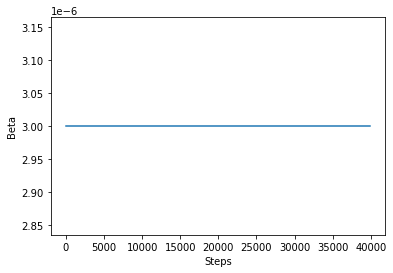

In [37]:
from train import BetaScheduler

TRAIN_STEPS = 40000
# 0.00001 so far works best for MAE - try lower
# recall 0.01 worked okay for probabilistic - proba still too unstable!
beta_sched = BetaScheduler('linear', 
                           beta=0.000003, 
                           beta_max=0.000003, 
                           max_steps=TRAIN_STEPS, 
                           cycles=90, 
                           duty_cycle=0.5
                           )

In [38]:
def save_weights(path,t=""):
    os.makedirs(path, exist_ok=True)

    print('Saving model weights...')
    # Save the standardisation params
    np.savez(model_path + 'hyper_params', means_obs=means_obs, stds_obs=stds_obs, means_goals=means_goals, stds_goals=stds_goals, 
             RELATIVE = RELATIVE,QUAT = QUAT,JOINTS = JOINTS,VELOCITY = VELOCITY,USE_QUAT_OBS = USE_QUAT_OBS,USE_QUAT_AUGMENTATION = USE_QUAT_AUGMENTATION,
             LAYER_SIZE = LAYER_SIZE,LATENT_DIM = LATENT_DIM,GRIPPER_WEIGHT = GRIPPER_WEIGHT,GCBC = GCBC,PROBABILISTIC = PROBABILISTIC, arm=arm,
             QUANTISED=QUANTISED, scaling=scaling)

    # save timestepped version
    
    # actor.save_weights(path + 'model_'+str(t)+'.h5')
    # if not GCBC:
    #     planner.save_weights(path + 'planner_'+str(t)+'.h5')
    #     encoder.save_weights(path + 'encoder_'+str(t)+'.h5')

    #save the latest version
    actor.save_weights(path + 'model.h5')
    if not GCBC:
        planner.save_weights(path + 'planner.h5')
        encoder.save_weights(path + 'encoder.h5')

    print('Weights saved!')

In [39]:
colors_dict = {
 'press button': [1,0,0], # red
 'dial off': [0.2, 0.6, 0.2], # green
 'dial on': [0, 0.8, 0], # bolder green
 'door left':[0.6, 0, 0.8], # purple #9900cc
 'door right':[0.8,0.2,0.99],
 'drawer in':[0.4, 0.2,0], # browns #cc9900
 'drawer out':[0.8, 0.6, 0],
 'block in drawer':[0.9,0.9,0.4], # yellows
 'block out of drawer':[1,0.8,0.8],
 'block in cupboard left':[1,0.4,1], #brighter purple #ff66ff
 'block in cupboard right':[0.8, 0.4, 1.0], # lighter purpple #cc33ff,,
 'block out of cupboard left':[0.6, 0.4, 1.0], # bluer purpe #9966ff
 'block out of cupboard right':[0.6, 0.6, 1.0], # bluer lilac #9999ff
 'pick place': [0, 0.7, 1.0], # #00BFFF eveertything from here down is shades of blue
 'knock down block': [0.1, 0.6, 0.8],
 'stand up block': [0.05, 0.4, 0.8], ##0E61D1
 'lift up': [0.05, 0.2, 0.7], # #1432BA
 'take down':[0.03, 0.001, 0.6], # #1B03A3
 'rotate block left': [0.2, 0.8, 0.8],
 'rotate block right':[0.2, 0.8, 1.0] 
}


bucket_map = {
 'press button': 'button',
 'dial off': 'dial',
 'dial on': 'dial',
 'door left':'cupboard door left',
 'door right':'cupboard door right',
 'drawer in':'drawer in',
 'drawer out':'drawer out',
 'block in drawer':'block in/out drawer',
 'block out of drawer':'block in/out drawer',
 'block in cupboard left':'block in/out cupboard',
 'block in cupboard right':'block in/out cupboard',
 'block out of cupboard left':'block in/out cupboard',
 'block out of cupboard right':'block in/out cupboard',
 'pick place': 'block',
 'knock down block': 'block',
 'stand up block': 'block', ##0E61D1
 'lift up': 'block + shelf',
 'take down': 'block + shelf',
 'rotate block left': 'block',
 'rotate block right':'block', 
}

bucket_colors = {
 'button': [1,0,0],
 'dial': [0.6, 0, 0.8],
 'cupboard door left':[0.2, 0.6, 0.2] , # purple #9900cc
 'cupboard door right':[0.4, 0.9, 0.2] , # purple #9900cc
 'drawer in':[0.4, 0.2,0], # browns #cc9900
 'drawer out':[0.8, 0.6, 0],
 'block in/out drawer':[0.8,0.8,0.4], # yellows
 'block in/out cupboard':[0.8, 0.4, 1.0], #brighter purple #ff66ff
 'block': [0, 0.7, 1.0], # #00BFFF eveertything from here down is shades of blue
 'block + shelf': [0.05, 0.2, 0.7],
}


bucket = True
hold_out = ['dial']

def get_labelled_trajs():
    test_labels = np.load(TEST_DIR + '/trajectory_labels.npz', allow_pickle=True)['trajectory_labels']
    acts,obs,labels, colors, paths = [], [], [], [], []
    # this could be sped up significantly by just storing the trajs in memory, it takes ms on my local, but is a bit slow with colabs cpu
    

    for k,v in test_labels.flatten()[0].items():
      if bucket:
        if v in bucket_map:
          v = bucket_map[v]
          c = bucket_colors[v]
      else:
        c = colors_dict[v]
      if v not in hold_out:
        folder = k.split('states_and_ims/')[1].split('/')[0]
        start = int(k.split('env_states/')[1].split('/')[0].strip('.bullet'))
        data = np.load(TEST_DIR+'/obs_act_etc/'+folder+'/data.npz')
        traj_len = 40
        end = start + traj_len #min(len(data['acts_rpy'])-1,start+traj_len )
        traj_acts = data['acts_rpy'][start:end]
        traj_obs = data['obs_rpy'][start:end]
        acts.append(traj_acts), obs.append(traj_obs),labels.append(v), colors.append(c), paths.append(k.replace('data_collection/collected_data/UR5_25Hz_test_suite/', TEST_DIR))

        


    return np.array(obs), np.array(acts), labels, colors, paths

def project_labelled_latents(reducer, z_enc, colors):
    reducer.fit(z_enc)
    z_enc_embed = reducer.transform(z_enc)
    fig = plt.figure(figsize=(14,14))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(z_enc_embed[:, 0], z_enc_embed[:, 1], s=60, label='z_enc', c = colors)
    ax.set_aspect('equal', 'datalim')
    ax.legend(loc='upper left')
    #plt.axis('off')
    plt.tight_layout()
    
    # The following two lines generate custom fake lines that will be used as legend entries:
    if bucket:
      colors_dict = bucket_colors.copy()
    for i in hold_out:
      del colors_dict[i]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors_dict.values()]
    plt.legend(markers, colors_dict.keys(), numpoints=1)
    return fig,scatter


def produce_cluster_fig():
    batch = v_it.next()
    obs, acts, labels, colors, paths = get_labelled_trajs()
    num_take = 1000
    batch_states,batch_acts, batch_colors = batch['obs'][:num_take, :40, :],batch['acts'][:num_take, :40, :], [[0.8,0.8,0.8,0.6]]*num_take
    z = encoder((np.concatenate([obs, batch_states])  ,np.concatenate([acts, batch_acts])))
    fig, scatter = project_labelled_latents(reducer, z.sample(), colors + batch_colors)
    return fig





# obs = obs[left_hemisphere]
# acts = acts[left_hemisphere]
# colors = [colors[i] for i in list(left_hemisphere[0])]


In [40]:
progbar = Progbar(TRAIN_STEPS, verbose=1, interval=0.5)
best_valid_loss = np.float('inf')

valid_inc = 20
save_inc = 1000
t = 0

train_loss_result = []
train_act_with_enc_loss_result = []
train_act_with_plan_loss_result = []
train_reg_loss_result = []
valid_loss_result = []
valid_act_with_enc_loss_result = []
valid_act_with_plan_loss_result = []
valid_reg_loss_result = []
valid_position_loss_result = []
valid_max_position_loss_result = []
valid_rotation_loss_result = []
valid_max_rotation_loss_result = []
valid_gripper_loss_result = []
beta_result = []
latent_img_result = []

# WandB
wandb.init(project="learning-from-play_v2")

config = wandb.config

# Hparams
config.DEVICE = DEVICE
config.BATCH_SIZE_PER_REPLICA = BATCH_SIZE_PER_REPLICA
config.WINDOW_SIZE = WINDOW_SIZE
config.WINDOW_SHIFT = WINDOW_SHIFT
config.SHUFFLE_SIZE = SHUFFLE_SIZE
config.PREFETCH_SIZE = PREFETCH_SIZE
config.NUM_WORKERS = NUM_WORKERS
config.LAYER_SIZE = LAYER_SIZE
config.LATENT_DIM = LATENT_DIM
config.GRIPPER_WEIGHT = GRIPPER_WEIGHT
config.TRAIN_STEPS = TRAIN_STEPS
config.beta_schedule = beta_sched.schedule
config.beta_min = beta_sched.beta_min
config.beta_max = beta_sched.beta_max
config.PROBABILISTIC = PROBABILISTIC
config.PROPRIOCEPTION = PROPRIOCEPTION


In [31]:
v_it = iter(valid_dataset) #for the cluster fig

In [41]:
wandb.run.name ="NB0.000003"

model_name = wandb.run.name
model_path = f'/content/drive/My Drive/Robotic Learning/LMP_test/{model_name}/'



In [ ]:
while t < TRAIN_STEPS:
    start_time = time.time()
    beta = beta_sched.scheduler(t)
    x = next(train_dist_dataset)
    total_train_loss = distributed_train_step(x, beta)
    
    if t % valid_inc == 0:
        valid_x = next(valid_dist_dataset)
        if GCBC:
          total_val_loss = distributed_test_step(valid_x, beta)
        else:
          total_val_loss, ze, zp = distributed_test_step(valid_x, beta)

        # validation plotting
        progbar.add(valid_inc, [('Train Loss', train_loss.result()), ('Validation Loss', valid_loss.result()), ('Time (s)', round(time.time() - start_time, 1))])

        train_loss_result.append(train_loss.result())
        valid_loss_result.append(valid_loss.result())
        valid_position_loss_result.append(valid_position_loss.result())
        valid_max_position_loss_result.append(valid_max_position_loss.result())
        valid_rotation_loss_result.append(valid_rotation_loss.result())
        valid_max_rotation_loss_result.append(valid_max_rotation_loss.result())
        valid_gripper_loss_result.append(valid_gripper_loss.result())

        if GCBC:
          wandb.log({'train_loss_result':train_loss_result[-1],
                      'valid_loss_result':valid_loss_result[-1],
                      'valid_position_loss_result':valid_position_loss_result[-1],
                      'valid_max_position_loss_result':valid_max_position_loss_result[-1],
                      'valid_rotation_loss_result':valid_rotation_loss_result[-1],
                      'valid_max_rotation_loss_result':valid_max_rotation_loss_result[-1],
                      'valid_gripper_loss_result':valid_gripper_loss_result[-1]
                    },
                    step=t)
        else:
                    # Latent space projection
          latent_fig = project_latents(reducer, ze, zp)
          latent_img = plot_to_image(latent_fig)
          train_act_with_enc_loss_result.append(train_act_with_enc_loss.result())
          train_act_with_plan_loss_result.append(train_act_with_plan_loss.result())
          train_reg_loss_result.append(train_reg_loss.result())
          valid_act_with_enc_loss_result.append(valid_act_with_enc_loss.result())
          valid_act_with_plan_loss_result.append(valid_act_with_plan_loss.result())
          valid_reg_loss_result.append(valid_reg_loss.result())
          beta_result.append(beta)
          latent_img_result.append(latent_img)

          wandb.log({'train_loss_result':train_loss_result[-1],
                      'train_act_with_enc_loss_result':train_act_with_enc_loss_result[-1],
                      'train_act_with_plan_loss_result':train_act_with_plan_loss_result[-1],
                      'train_reg_loss_result':train_reg_loss_result[-1],
                      'valid_loss_result':valid_loss_result[-1],
                      'valid_act_with_enc_loss_result':valid_act_with_enc_loss_result[-1],
                      'valid_act_with_plan_loss_result':valid_act_with_plan_loss_result[-1],
                      'valid_reg_loss_result':valid_reg_loss_result[-1],
                      'valid_position_loss_result':valid_position_loss_result[-1],
                      'valid_max_position_loss_result':valid_max_position_loss_result[-1],
                      'valid_rotation_loss_result':valid_rotation_loss_result[-1],
                      'valid_max_rotation_loss_result':valid_max_rotation_loss_result[-1],
                      'valid_gripper_loss_result':valid_gripper_loss_result[-1],
                      'beta_result':beta_result[-1],
                      #'latent_img_result':latent_fig,
                    },
                    step=t)
          

          
          
        # reset metrics
        train_loss.reset_states()
        train_act_with_enc_loss.reset_states()
        train_act_with_plan_loss.reset_states()
        train_reg_loss.reset_states()
        valid_loss.reset_states()
        valid_act_with_enc_loss.reset_states()
        valid_act_with_plan_loss.reset_states()
        valid_reg_loss.reset_states()

        valid_position_loss.reset_states()
        valid_max_position_loss.reset_states()
        valid_rotation_loss.reset_states()
        valid_max_rotation_loss.reset_states()
        valid_gripper_loss.reset_states()



    if t % save_inc == 0:
        save_weights(model_path, t)
        if not GCBC:
          cluster_fig = produce_cluster_fig()
          wandb.log({'latent_img_result':cluster_fig,}, step=t)

    t += 1

   40/40000 [..............................] - ETA: 95:56:40 - Train Loss: 0.0388 - Validation Loss: 0.0292 - Time (s): 64.8000 Saving model weights...
Weights saved!


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


   60/40000 [..............................] - ETA: 74:11:10 - Train Loss: 0.0330 - Validation Loss: 0.0258 - Time (s): 44.1000

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 1040/40000 [..............................] - ETA: 22:17:17 - Train Loss: 0.0066 - Validation Loss: 0.0116 - Time (s): 5.1192Saving model weights...
Weights saved!


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



 1060/40000 [..............................] - ETA: 22:15:11 - Train Loss: 0.0065 - Validation Loss: 0.0116 - Time (s): 5.0604

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 2040/40000 [>.............................] - ETA: 20:16:53 - Train Loss: 0.0045 - Validation Loss: 0.0112 - Time (s): 3.9451Saving model weights...
Weights saved!


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



 2060/40000 [>.............................] - ETA: 20:15:43 - Train Loss: 0.0045 - Validation Loss: 0.0112 - Time (s): 3.9301

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 3040/40000 [=>............................] - ETA: 19:20:04 - Train Loss: 0.0037 - Validation Loss: 0.0113 - Time (s): 3.5658Saving model weights...
Weights saved!


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



 3060/40000 [=>............................] - ETA: 19:19:16 - Train Loss: 0.0036 - Validation Loss: 0.0113 - Time (s): 3.5556

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 4040/40000 [==>...........................] - ETA: 18:36:18 - Train Loss: 0.0032 - Validation Loss: 0.0115 - Time (s): 3.3663Saving model weights...
Weights saved!


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



 4060/40000 [==>...........................] - ETA: 18:35:44 - Train Loss: 0.0032 - Validation Loss: 0.0115 - Time (s): 3.3596

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:410: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/renderer.py:512: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



 4540/40000 [==>...........................] - ETA: 18:15:25 - Train Loss: 0.0030 - Validation Loss: 0.0116 - Time (s): 3.2952

In [ ]:
\save_weights_old(model_path)

Saving model weights...
Weights saved!


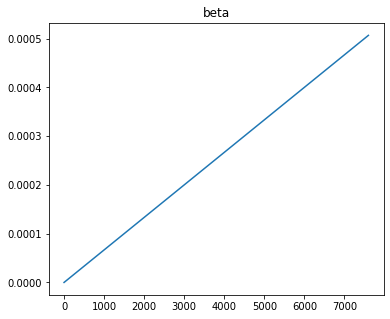

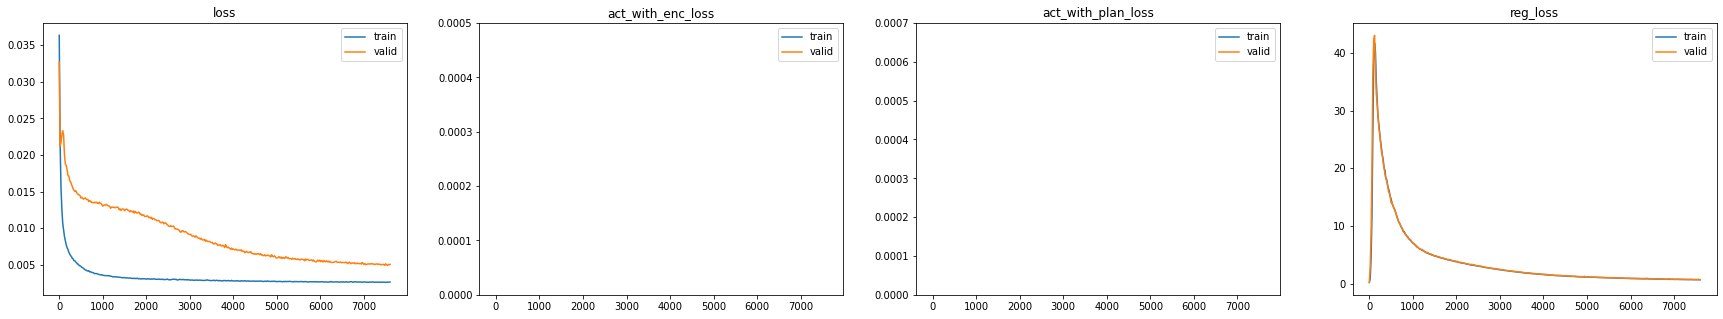

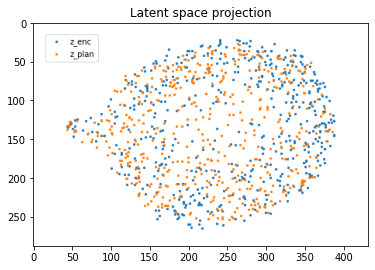

In [ ]:
#@title Broke man's Tensorboard
s = np.arange(t, step=valid_inc)

# hparams/
if not GCBC:
  f1,ax1 = plt.subplots(1,1, figsize=(6,5))
  ax1.plot(s, beta_result, label='beta')
  ax1.set_title('beta')

# losses/
f2,ax2 = plt.subplots(1,4, figsize=(30,5))
ax2[0].plot(s, train_loss_result[:-1], label='train')
ax2[0].plot(s, valid_loss_result[:-1], label='valid')
ax2[0].set_title('loss')
#ax2[0].set_ylim(0,1e-3)
if not GCBC:
  ax2[1].plot(s, train_act_with_enc_loss_result, label='train')
  ax2[1].plot(s, valid_act_with_enc_loss_result, label='valid')
  ax2[1].set_title('act_with_enc_loss')
  ax2[1].set_ylim(0,5e-4)
  ax2[2].plot(s, train_act_with_plan_loss_result, label='train')
  ax2[2].plot(s, valid_act_with_plan_loss_result, label='valid')
  ax2[2].set_title('act_with_plan_loss')
  ax2[2].set_ylim(0,7e-4)
  ax2[3].plot(s, train_reg_loss_result, label='train')
  ax2[3].plot(s, valid_reg_loss_result, label='valid')
  ax2[3].set_title('reg_loss')
  [ax.legend() for ax in ax2]
# [ax.set_yscale('log') for ax in ax2]

  # images/
  f3,ax3 = plt.subplots(1,1, figsize=(6,5))
  ax3.imshow(latent_img_result[-1].numpy()[0], label='latent_img_result')
  ax3.set_title('Latent space projection')

  plt.show()

In [ ]:
# %tensorboard --logdir {tb_base_dir}
model_name ="NB0.00001"
model_path = f'/content/drive/My Drive/Robotic Learning/LMP_test/{model_name}/'
n  = "" #"_15000"
actor.load_weights(f'{model_path}/model'+n+'.h5')
planner.load_weights(f'{model_path}/planner'+n+'.h5')
encoder.load_weights(f'{model_path}/encoder'+n+'.h5')

In [ ]:
v_it = iter(valid_dataset)

In [ ]:
#@title Sample a batch for timeseries plotting
# Lets plot pred actions vs true actions

batch = v_it.next()
states,acts,goals,seq_lens,masks = batch['obs'],batch['acts'],batch['goals'],batch['seq_lens'],batch['masks']
if GCBC:
  pred_acts = actor([states, goals])
else:
  encoding = encoder([states,acts])
  plan = planner([states[:, 0, :], goals[:, 0, :]]) 
                                                  
  # check if encoder is overfitting on validation
  z_enc = z = tf.tile(tf.expand_dims(encoding.sample(), 1), (1, WINDOW_SIZE, 1))
  enc_act_distrib = actor([states, z_enc, goals])

  # true validation performance, w/ planner
  z = tf.tile(tf.expand_dims(plan.sample(), 1), (1, WINDOW_SIZE, 1))
  pred_acts = actor([states, z, goals]) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

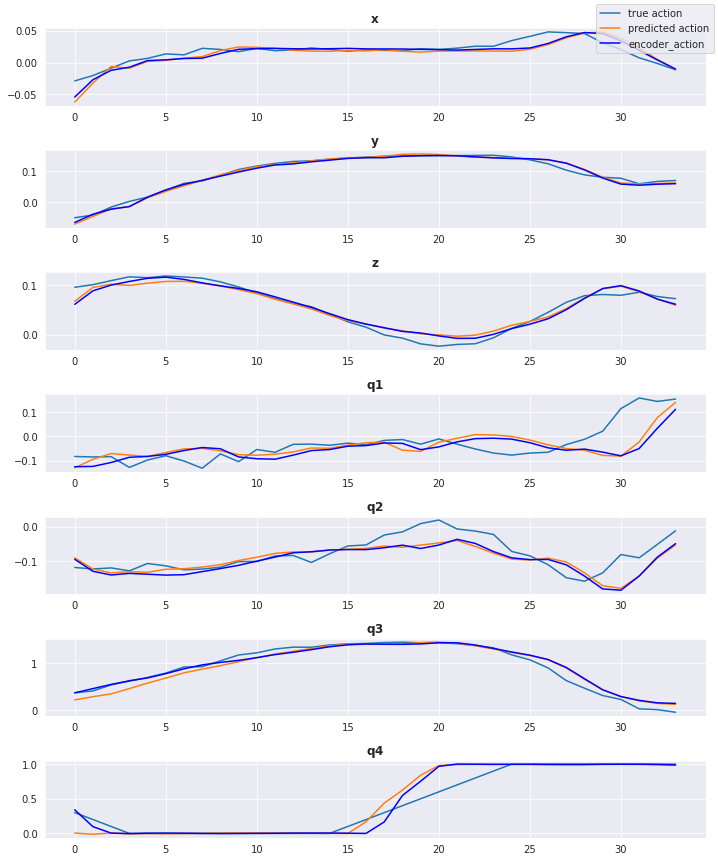

In [ ]:
#@title Plot timeseries of state/action tracking over time - xyz q1234 gripper
import seaborn as sns
sns.set_style("darkgrid")

idx = 9
seq_len = int(seq_lens[idx])
x = np.arange(seq_len)
labels = ['x','y','z','q1','q2','q3','q4','gripper']
fig, axes = plt.subplots(ACT_DIM, 1, figsize=(10,12), squeeze=True)
for i in range(ACT_DIM):
    #sns.lineplot(x, acts[idx,:seq_len,i], color='r', ax=axes[i])
    axes[i].plot(acts[idx,:seq_len,i])
    axes[i].plot(pred_acts[idx, :seq_len,i])
    #sns.lineplot(x, pred_acts[idx, :seq_len,i], color='g', ax=axes[i])
    if not GCBC:
      sns.lineplot(x, enc_act_distrib[idx, :seq_len,i], color='b', ax=axes[i])
      axes[i].set_title(f'$\\bf{labels[i]}$')
    
fig.legend( ('true action', 'predicted action', 'encoder_action'))    
plt.tight_layout()
plt.show()

In [ ]:
colors[2,5]

TypeError: ignored

In [ ]:
z_enc_embed = reducer.transform(z.sample())

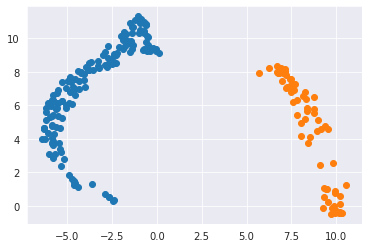

In [ ]:
# labelled is
z_labelled = z_enc_embed[:len(obs)]
left_hemisphere = np.where(z_labelled[:,0] < 4)
right_hemisphere = np.where(z_labelled[:,0] > 4)
plt.scatter(z_labelled[left_hemisphere][:,0] , z_labelled[left_hemisphere][:,1])
plt.scatter(z_labelled[right_hemisphere][:,0], z_labelled[right_hemisphere][:, 1])

In [ ]:
paths_left = [paths[i] for i in list(left_hemisphere[0])]
paths_right = [paths[i] for i in list(right_hemisphere[0])]

In [ ]:
np.savez('/content/drive/My Drive/Robotic Learning/LMP_test/left_right', left = paths_left, right=paths_right)

In [ ]:
model_path

'/content/drive/My Drive/Robotic Learning/LMP_test/LMP_B=0.0001/'

In [ ]:
# Testing that diversity does increase with more training data
t_it = iter(train_dataset)
mins = np.min(dataset['obs_rpy'], axis = 0)
maxes = np.max(dataset['obs_rpy'], axis = 0)
shape = dataset['obs_rpy'].shape[1]
bins = np.linspace(mins,maxes+0.01, 11)


def get_quantisation(ags, bins):
    qs = []
    for idx in range(0 , shape):
      quantiles = np.digitize(ags[:, idx], bins[:,idx])
      qs.append(quantiles)
    return np.array(qs).T



batch = t_it.next()
o = tf.reshape(batch['obs'][:,:,:], (-1, OBS_DIM))
coverage = get_quantisation(o, bins)

shapes = []
for i in range(0,10):
  batch = t_it.next()
  o = tf.reshape(batch['obs'][:,:,:], (-1, OBS_DIM))
  c = get_quantisation(o, bins)
  coverage = np.unique(np.concatenate([coverage, c], 0), axis = 0)
  shapes.append(coverage.shape[0])


np.unique(get_quantisation(dataset['obs_rpy'], bins), axis = 0).shape

plt.plot([120215]*11)
plt.plot(old)
plt.plot(shapes)
plt.plot(one)

plt.title("Unique states observed in batches with shuffle size N")
plt.legend(['Unique values', 40, 10, 1])

(48402, 18)

In [ ]:
import pandas as pd
x = z.sample()[:, 0].numpy()
y = z.sample()[:, 1].numpy()
c = np.array(colors + [[0.8,0.8,0.8]]*num_take)
df = pd.DataFrame(list(zip(x, y, c)), 
               columns =['x', 'y', 'c'])
df
# https://community.plotly.com/t/how-can-i-change-the-opacity-of-specific-scatterplot-dots-markers/31306

,x,y,c
0,0.057199,-0.016884,"[0.05, 0.2, 0.7]"
1,0.202988,-0.036047,"[0.8, 0.6, 0.0]"
2,-0.502967,-0.013857,"[0.0, 0.7, 1.0]"
3,0.261230,0.033312,"[1.0, 0.0, 0.0]"
4,-0.491291,-0.014419,"[0.8, 0.8, 0.4]"
...,...,...,...
720,0.497182,-0.000160,"[0.8, 0.8, 0.8]"
721,0.189258,-0.015886,"[0.8, 0.8, 0.8]"
722,-0.180576,0.027540,"[0.8, 0.8, 0.8]"
723,-0.198601,-0.032588,"[0.8, 0.8, 0.8]"


In [ ]:
c

(725, 3)

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="x", y="y", color="c")
fig.show()

TypeError: ignored

In [ ]:
# Tristan if you wanted to play any of these out and see what they are labelled, load the env below as usual then do this
idx = 9
env.p.restoreState(fileName=paths[idx])
vid_path = 'output/videos/trajectory.mp4'
with imageio.get_writer(vid_path, mode='I') as writer:
    for i in range(0, 40):
        o ,r, d, _ = env.step(acts[idx][i,:])
        writer.append_data(o['img'])
        clear_output(wait=True)
        fig = plt.imshow(o['img'])
        plt.show()
print(labels[idx])

NameError: ignored

#Everything below here is old!


In [ ]:
# path = 'GCBCBoi'
# if GCBC:
#     actor.load_weights(f'saved_models/{path}/model.h5')
# else:
#     encoder.load_weights(f'saved_models/{path}/encoder.h5')
#     planner.load_weights(f'saved_models/{path}/planner.h5')

In [ ]:
import time
import pandaRL
import gym
import matplotlib.pyplot as plt 
from IPython.display import display, clear_output
import imageio
import eval

if arm == 'UR5':
    if JOINTS and RELATIVE:
        env = gym.make('UR5PlayRelJoints1Obj-v0')
    elif JOINTS and not RELATIVE:
        env = gym.make('UR5PlayAbsJoints1Obj-v0')
        #env = gym.make('pandaPlayJoints-v0')
    elif not JOINTS and RELATIVE and QUAT:
        env = gym.make('UR5PlayRel1Obj-v0')
    elif not JOINTS and RELATIVE and not QUAT:
        env = gym.make('UR5PlayRelRPY1Obj-v0')
    elif not JOINTS and not RELATIVE and not QUAT:
        env = gym.make('UR5PlayAbsRPY1Obj-v0')
    else:
        env = gym.make('UR5Play1Obj-v0')
else:
    if JOINTS and RELATIVE:
        env = gym.make('pandaPlayRelJoints1Obj-v0')
    elif JOINTS and not RELATIVE:
        env = gym.make('pandaPlayAbsJoints1Obj-v0')
        #env = gym.make('pandaPlayJoints-v0')
    elif not JOINTS and RELATIVE and QUAT:
        env = gym.make('pandaPlayRel1Obj-v0')
    elif not JOINTS and RELATIVE and not QUAT:
        env = gym.make('pandaPlayRelRPY1Obj-v0')
    elif not JOINTS and not RELATIVE and not QUAT:
        env = gym.make('pandaPlayAbsRPY1Obj-v0')
    else:
        env = gym.make('pandaPlay1Obj-v0')
        

env.reset()
env.render('playback')

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


/content/local_packages/pandaRL/pandaRL/envs


In [ ]:
model_params = {'layer_size':LAYER_SIZE, 'latent_dim':LATENT_DIM, 'training':False}
if PROBABILISTIC:
    actor = create_actor(**model_params, GCBC=GCBC, num_distribs=3)
else:
    actor = create_actor(**model_params, GCBC=GCBC)
actor.load_weights(f'{model_path}/model.h5')

In [ ]:
# Lets plot pred actions vs true actions
v_it = iter(valid_dataset.repeat())

In [ ]:
TEST_DIR+'/states_and_ims/'+str(f)+'/env_states/*.bullet'

'/content/drive/My Drive/Robotic Learning/UR5_25Hz_test_suite/states_and_ims/4/env_states/*.bullet'

In [ ]:
# Play out action histories
f = 4
eval_data = np.load(PYBULLET_DATA_DIR+'/obs_act_etc/'+str(f)+'/data.npz')
potential_start_points = glob.glob(TEST_DIR+'/states_and_ims/'+str(f)+'/env_states/*.bullet')

achieved_goals = eval_data['achieved_goals']

if JOINTS:
    if RELATIVE:
      rel = eval_data['target_poses'] - eval_data['joint_poses'][:,:7]
    else:
      rel = eval_data['target_poses']

    gripper = eval_data['acts'][:,-1,tf.newaxis]
    actions = tf.concat([rel, gripper], axis=-1)
    observations = tf.concat([eval_data['obs'],eval_data['joint_poses'][:,:7]], axis=-1)#.astype('float32')
else:
    if USE_QUAT_OBS:
      observations = eval_data['obs']
    else:
      observations = eval_data['obs_rpy']
    if RELATIVE:
        if QUAT:
          rel = eval_data['acts'][:,:7] - eval_data['obs'][:,:7]
        else:
          rel = eval_data['acts_rpy_rel'][:,:6]
        
        gripper = eval_data['acts'][:,-1,tf.newaxis]
        actions = tf.concat([rel, gripper], axis=-1)
    else:
        if QUAT:
            acts = eval_data['acts']
        else:
            acts = eval_data['acts_rpy']


if VELOCITY:
  observations = tf.concat([observations, eval_data['velocities']],-1)

def get_random_start_point(potential_start_points):
    idx = np.random.choice(len(potential_start_points))
    path = potential_start_points[idx]
    tstep = int(path.split("/")[-1].replace('.bullet',''))
    return path, tstep

print(observations.shape, acts.shape)

(1377, 18) (1377, 7)


In [ ]:
path, start = get_random_start_point(potential_start_points)


In [ ]:
env.p.restoreState(fileName=path)
vid_path = 'output/videos/trajectory.mp4'
with imageio.get_writer(vid_path, mode='I') as writer:
    for i in range(start, start+WINDOW_SIZE):
        o ,r, d, _ = env.step(actions[i,:])
        writer.append_data(o['img'])
        clear_output(wait=True)
        fig = plt.imshow(o['img'])
        plt.show()
        #time.sleep(0.01)

error: ignored

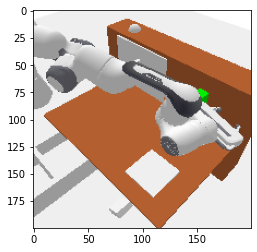

In [ ]:
# Play out stateful model predictions
path, start = get_random_start_point(potential_start_points)
env.p.restoreState(fileName=path)

vid_path = 'output/videos/trajectory.mp4'

eval_seq_len = WINDOW_SIZE
goal = achieved_goals[start+eval_seq_len][tf.newaxis,tf.newaxis,:] # same as two expand_dims

replay = True 



if replay:
    retries = 1
else:
    retries = 2


state = env.panda.calc_state()
if USE_QUAT_OBS:
    obs = state['observation']
else:
    obs = np.concatenate(state['observation'][0:3], p.getEulerFromQuaternion(state['observation'][3:7]) , state['observation'][7:]])
if JOINTS:
    o = tf.expand_dims(tf.expand_dims(np.concatenate([obs, state['joints'][:7]]),0),0)
else:
    o = tf.expand_dims(tf.expand_dims(obs,0),0)
    
if VELOCITY:
    o = tf.concat([o,tf.expand_dims(tf.expand_dims(tf.cast(state['velocity'],tf.float32),0),0)], axis = -1)

a_true = actions[start:start+WINDOW_SIZE]
a_pred = []
with imageio.get_writer(vid_path, mode='I') as writer:
  for j in range(0,retries):
      if not GCBC:
          plan, _ = planner((o[0], goal[0]))
          z = tf.expand_dims(plan.sample(),0)
      actor.reset_states()
      if not replay:
          replan_horizon = 30
      else:
          replan_horizon = WINDOW_SIZE
          
      for i in range(0, replan_horizon):

          if GCBC:
              a = actor((o, goal)).numpy().squeeze()
              a_pred.append(a)
          else:
              a = actor((o, z,goal)).numpy().squeeze()
              a_pred.append(a)

          if replay:
              a=a_true[i, :]
          
          o, r, d, _ = env.step(a)
          vel= tf.expand_dims(tf.expand_dims(tf.cast(o['velocity'],tf.float32),0),0)
          writer.append_data(o['img'])
          clear_output(wait=True)
          fig = plt.imshow(o['img'])
          plt.show()
          if USE_QUAT_OBS:
              obs = o['observation']
          else:
              obs = np.concatenate(o['observation'][0:3], p.getEulerFromQuaternion(o['observation'][3:7]) , o['observation'][7:]])
              
          if JOINTS:
              o = tf.expand_dims(tf.expand_dims(np.concatenate([obs,o['joints'][:7]]), 0),0)
          else:
              o = tf.expand_dims(tf.expand_dims(obs, 0),0)
          if VELOCITY:
                o = tf.concat([o,vel], axis = -1)

In [ ]:
eval.render_mp4(vid_path)

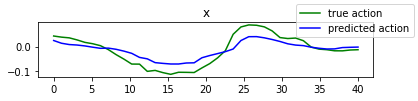

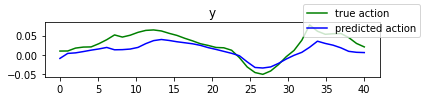

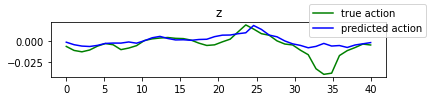

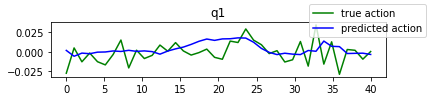

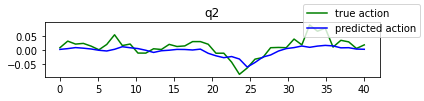

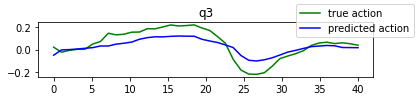

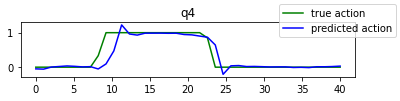

In [ ]:
a_true =  np.array(a_true)
a_pred = np.array(a_pred)
length_true = len(a_true)
length_pred = len(a_pred)
actions_space = a_true.shape[-1]
x_true = np.linspace(0, length_true, num=length_true) 
x_pred = np.linspace(0, length_pred, num=length_pred) 
labels = ['x','y','z','q1','q2','q3','q4','gripper']
for i in range(0,actions_space):
    fig, axes = plt.subplots(1, 1, figsize=(6,1.0), squeeze=False)
    # One Model
    axes[0,0].plot(x_true,a_true[:,i],'green')
    axes[0,0].plot(x_pred,a_pred[:,i], 'b')
    fig.legend( ('true action', 'predicted action'))
   
    plt.title(labels[i])
    plt.show()

In [ ]:
#@title Explore MMD INFOVAE reg for encoder, with planner chasing it.



In [ ]:
def compute_kernel(x, y):
  x_size = tf.shape(x)[0]
  y_size = tf.shape(y)[0]
  dim = tf.shape(x)[1]
  tiled_x = tf.tile(tf.reshape(x, tf.stack([x_size, 1, dim])), tf.stack([1, y_size, 1]))
  print(tiled_x, x, y)
  tiled_y = tf.tile(tf.reshape(y, tf.stack([1, y_size, dim])), tf.stack([x_size, 1, 1]))
  print(tiled_x.shape, tiled_y.shape)
  return tf.exp(-tf.reduce_mean(tf.square(tiled_x - tiled_y), axis=2) / tf.cast(dim, tf.float32))

def compute_mmd(x, y, sigma_sqr=2.0/LATENT_DIM):
  x_kernel = compute_kernel(x, x)
  y_kernel = compute_kernel(y, y)
  xy_kernel = compute_kernel(x, y)
  return tf.reduce_mean(x_kernel) + tf.reduce_mean(y_kernel) - 2 * tf.reduce_mean(xy_kernel)

true_samples = tfd.Normal([0.1,0.1,0.1], [1,1,1])
encoding = tfd.Normal([0.1,0.1,0.1], [1,1,1])
loss_mmd = compute_mmd(true_samples.sample(), encoding.sample())


InvalidArgumentError: ignored

In [ ]:


LAYER_SIZE = 512
LATENT_DIM = 256

with strategy.scope():
    # Keras .fit API
  #loss_fn = lambda y, p_y: -p_y.log_prob(y)
  action_loss = tf.keras.losses.MeanAbsoluteError(reduction=tf.keras.losses.Reduction.NONE)

  def compute_kernel(x, y):
    x_size = tf.shape(x)[0]
    y_size = tf.shape(y)[0]
    dim = tf.shape(x)[1]
    tiled_x = tf.tile(tf.reshape(x, tf.stack([x_size, 1, dim])), tf.stack([1, y_size, 1]))
    tiled_y = tf.tile(tf.reshape(y, tf.stack([1, y_size, dim])), tf.stack([x_size, 1, 1]))
    return tf.exp(-tf.reduce_mean(tf.square(tiled_x - tiled_y), axis=2) / tf.cast(dim, tf.float32))

  def compute_mmd(x, y, sigma_sqr=2.0/LATENT_DIM):
      x_kernel = compute_kernel(x, x)
      y_kernel = compute_kernel(y, y)
      xy_kernel = compute_kernel(x, y)
      return tf.reduce_mean(x_kernel) + tf.reduce_mean(y_kernel) - 2 * tf.reduce_mean(xy_kernel)
  
  def compute_loss(labels, predictions, mask, seq_lens):
      per_example_loss = action_loss(labels, predictions) * mask
      per_example_loss = tf.reduce_sum(per_example_loss, axis = 1) / seq_lens # take mean along the timestep
      return tf.nn.compute_average_loss(per_example_loss, global_batch_size=GLOBAL_BATCH_SIZE)

  def compute_regularisation_loss(plan, encoding):
      reg_loss = KL(plan, encoding) #+ KL(encoding, plan)
      return tf.nn.compute_average_loss(reg_loss, global_batch_size=GLOBAL_BATCH_SIZE)

  def encoder_regularisation(encoding):
    B = encoding.shape[0]
    true_samples = tf.random_normal(tf.stack([B, z_dim]))
    loss_mmd = compute_mmd(true_samples, encoding.sample())

  train_act_loss = tf.keras.metrics.Mean(name='act_loss')
  valid_act_loss = tf.keras.metrics.Mean(name='valid_act_loss')

  train_reg_loss = tf.keras.metrics.Mean(name='reg_loss')
  valid_reg_loss = tf.keras.metrics.Mean(name='valid_reg_loss')

  valid_act_with_enc_loss = tf.keras.metrics.Mean(name='valid_act_with_enc_loss')
  train_act_with_plan_loss = tf.keras.metrics.Mean(name='train_act_with_plan_loss')

  
  model_params = {'layer_size':LAYER_SIZE, 'GCBC':False}
  model = actor(**model_params)

  model_params = {'layer_size':LAYER_SIZE, 'latent_dim':LATENT_DIM}
  encoder = ENCODER_LSTM(latent_dim=LATENT_DIM)
  planner = create_planner(**model_params)

  optimizer = tfa.optimizers.AdamW(1e-4, 2e-4) #tf.keras.optimizers.Adam(2e-4)

  checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)

def step(inputs, GCBC=False, training = False):
  (states, goals, actions, mask, seq_lens) = inputs
  if GCBC:
    distrib = model(states, goals=goals, training = training)
    return  compute_loss(actions, distrib, mask, seq_lens), distrib
  else:
  
    encoding = encoder(states, actions, training=training)
    final_goals = goals[:, 0, :]
    plan, _ = planner((states[:, 0, :], final_goals))  # the final goals are tiled out over the entire non masked sequence, so the first timestep is the final goal. 
    if training: # we must expand it out so each input state has a corresponding plan
      z = tf.tile(tf.expand_dims(encoding.sample(), 1), (1, rsd.MAX_SEQ_LEN, 1))
      distrib = model(states, z, goals, training=training)
      z_plan = tf.tile(tf.expand_dims(plan.sample(), 1), (1, rsd.MAX_SEQ_LEN, 1))
      plan_acts = model(states, z_plan, goals, training=training)
      train_act_with_plan_loss.update_state(compute_loss(actions, plan_acts, mask, seq_lens))
    
    else:
      # check if encoder is overfitting on validation
      z_enc = z = tf.tile(tf.expand_dims(encoding.sample(), 1), (1, rsd.MAX_SEQ_LEN, 1))
      enc_act_distrib = model(states, z_enc, goals, training = training)
      valid_act_with_enc_loss.update_state(compute_loss(actions, enc_act_distrib, mask, seq_lens))

      # true validation performance, w/ planner
      z = tf.tile(tf.expand_dims(plan.sample(), 1), (1, rsd.MAX_SEQ_LEN, 1))
      distrib = model(states, z, goals, training = training) 
      

    action_loss = compute_loss(actions, distrib, mask, seq_lens)
    
    regularisation_loss = compute_regularisation_loss(plan, encoding)
    
    return action_loss, regularisation_loss


# Now outside strategy .scope
def train_step(inputs, GCBC = False):
  with tf.GradientTape() as tape:
    act_loss, reg_loss = step(inputs, GCBC = GCBC, training=True)
    loss = act_loss + reg_loss  * BETA
    
  train_act_loss.update_state(act_loss)
  train_reg_loss.update_state(reg_loss)
  gradients = tape.gradient(loss, model.trainable_variables+encoder.trainable_variables+planner.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables+encoder.trainable_variables+planner.trainable_variables))
  
  return loss

def test_step(inputs, GCBC=False):
  act_loss, reg_loss = step(inputs, GCBC = GCBC, training=False)
  valid_act_loss.update_state(act_loss)
  valid_reg_loss.update_state(reg_loss)
  return act_loss + reg_loss  * BETA

@tf.function
def distributed_train_step(dataset_inputs):
  per_replica_losses = strategy.run(train_step, args=(dataset_inputs,))
  return strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses, axis = None)

@tf.function
def distributed_test_step(dataset_inputs):
  per_replica_losses = strategy.run(test_step, args=(dataset_inputs,))
  return strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses, axis = None)


train_dist_dataset = iter(strategy.experimental_distribute_dataset(train_dataset.repeat()))
valid_dist_dataset = iter(strategy.experimental_distribute_dataset(valid_dataset.repeat()))

In [ ]:


trial_run(1e-2)
trial_run(1e-3)
trial_run(1e-4)
trial_run(1e-1)

In [ ]:
int(seq_lens[idx])

30

Gradients are "calculated on each replica, they are synced across the replicas by **summing** them"
https://www.tensorflow.org/tutorials/distribute/custom_training#define_the_loss_function

In [ ]:
# Keras .fit API
loss_fn = lambda y, p_y: -p_y.log_prob(y)
# loss_fn = MeanSquaredError()

def compute_loss(labels, predictions):
    per_example_loss = loss_fn(labels, predictions)
    return tf.nn.compute_average_loss(per_example_loss, global_batch_size=GLOBAL_BATCH_SIZE)

with strategy.scope():
    model = create_lstm_model_v2(**model_params)
    model.compile(optimizer=Adam(learning_rate=1e-3),
                experimental_steps_per_execution = 2,
                loss=compute_loss,
                metrics=['mean_absolute_error'])

steps_per_epoch = 100
validation_steps = 10

callbacks = [
    # tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    # tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True),
    # tf.keras.callbacks.LearningRateScheduler(decay),
]

history = model.fit(train_data,
          epochs=10,
          steps_per_epoch=steps_per_epoch,
          validation_data=valid_data, 
          validation_steps=validation_steps
        #   callbacks=callbacks
          )

Epoch 1/10
 10/100 [==>...........................] - ETA: 3:02 - loss: 979.5474 - mean_absolute_error: 1.1801 

KeyboardInterrupt: ignored

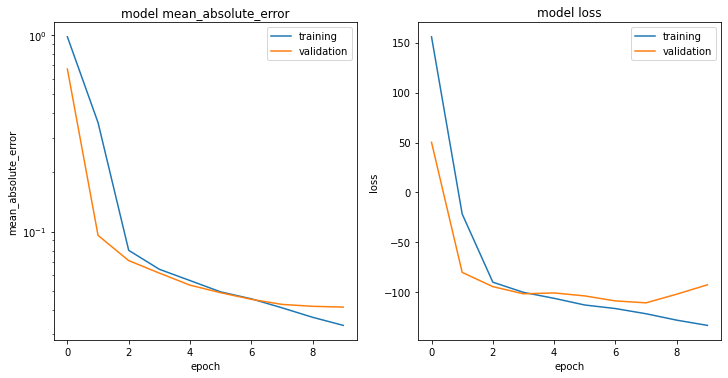

In [ ]:
def display_training_curves(training, validation, title, subplot, yscale='linear'):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])
  plt.yscale(yscale)

plt.subplots(figsize=(10,5))
plt.tight_layout()
display_training_curves(history.history['mean_absolute_error'], history.history['val_mean_absolute_error'], 'mean_absolute_error', 121, yscale='log')
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 122)

In [ ]:
# For doing custom TPU training loops

# @tf.function
# def train_step(iterator):
#   """The step function for one training step"""

#   def step_fn(inputs):
#     """The computation to run on each TPU device."""
#     images, labels = inputs
#     with tf.GradientTape() as tape:
#       logits = model(images, training=True)
#       loss = tf.keras.losses.sparse_categorical_crossentropy(
#           labels, logits, from_logits=True)
#       loss = tf.nn.compute_average_loss(loss, global_batch_size=batch_size)
#     grads = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(list(zip(grads, model.trainable_variables)))
#     training_loss.update_state(loss * strategy.num_replicas_in_sync)
#     # training_accuracy.update_state(labels, logits)

#   strategy.run(step_fn, args=(next(iterator),))

In [ ]:
import time
import pandaRL
import gym
import matplotlib.pyplot as plt 
from IPython.display import display, clear_output
import imageio
import eval

if RELATIVE_JOINTS:
  env = gym.make('pandaPlayJoints1Obj-v0')
else:
  env =  gym.make('pandaPlay-v0')
env.reset()
env.render('playback')

current_dir=/content/local_packages/pandaRL/pandaRL/envs
/content/local_packages/pandaRL/pandaRL/envs


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
# model.save_weights('/content/drive/My Drive/Robotic Learning/inference_model.h5')

In [ ]:
inference_model = create_lstm_model_v2(**model_params, training=False)
inference_model.set_weights(model.get_weights())
# inference_model.load_weights('/content/drive/My Drive/Robotic Learning/inference_model.h5')

In [ ]:
f = 14 # 51
eval_data = np.load(PYBULLET_DATA_DIR+'/obs_act_etc/'+str(f)+'/data.npz')
potential_start_points = glob.glob(PYBULLET_DATA_DIR+'/states_and_ims/'+str(f)+'/env_states/*.bullet')

observations = eval_data['obs']
achieved_goals = eval_data['achieved_goals']
if RELATIVE_JOINTS:
  joints = eval_data['target_poses'] - eval_data['joint_poses'][:,:7]
  gripper = np.expand_dims(eval_data['acts'][:, -1], -1)
  actions = np.concatenate([joints,gripper], -1) 
else:
  actions = eval_data['acts']

def get_random_start_point(potential_start_points):
    idx = np.random.choice(len(potential_start_points))
    path = potential_start_points[idx]
    tstep = int(path.split("/")[-1].replace('.bullet',''))
    return path, tstep

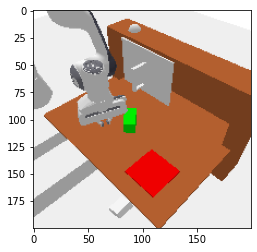

In [ ]:
# Play out action histories
f = 14 # 51
eval_data = np.load(PYBULLET_DATA_DIR+'/obs_act_etc/'+str(f)+'/data.npz')
potential_start_points = glob.glob(PYBULLET_DATA_DIR+'/states_and_ims/'+str(f)+'/env_states/*.bullet')

observations = eval_data['obs']
achieved_goals = eval_data['achieved_goals']
if RELATIVE_JOINTS:
  joints = eval_data['target_poses'] - eval_data['joint_poses'][:,:7]
  gripper = np.expand_dims(eval_data['acts'][:, -1], -1)
  actions = np.concatenate([joints,gripper], -1) 
else:
  actions = eval_data['acts']

def get_random_start_point(potential_start_points):
    idx = np.random.choice(len(potential_start_points))
    path = potential_start_points[idx]
    tstep = int(path.split("/")[-1].replace('.bullet',''))
    return path, tstep
    
path, start = get_random_start_point(potential_start_points)
env.p.restoreState(fileName=path)

vid_path = 'output/videos/trajectory.mp4'
with imageio.get_writer(vid_path, mode='I') as writer:
    for i in range(start, start+60):
        o ,r, d, _ = env.step(actions[i,:])
        writer.append_data(o['img'])
        clear_output(wait=True)
        fig = plt.imshow(o['img'])
        plt.show()
        time.sleep(0.01)

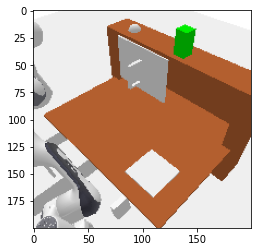

In [ ]:
# Play out stateful model predictions
path, start = get_random_start_point(potential_start_points)
env.p.restoreState(fileName=path)

vid_path = 'output/videos/trajectory.mp4'

eval_seq_len = 60
obs_in = observations[start][tf.newaxis,tf.newaxis,:]
g_in = achieved_goals[start+eval_seq_len][tf.newaxis,tf.newaxis,:] # same as two expand_dims
inference_model.reset_states()

eval_obs = []
eval_acts = []

with imageio.get_writer(vid_path, mode='I') as writer:
    for i in range(start, start+eval_seq_len):
        a = inference_model([obs_in, g_in]).sample()[0,0,:] # Reduce to 1d
        o ,r, d, _ = env.step(a)
        obs_in = o['observation'][tf.newaxis,tf.newaxis,:]
        writer.append_data(o['img'])
        clear_output(wait=True)
        fig = plt.imshow(o['img'])
        plt.show()

        eval_obs.append(o['observation'])
        eval_acts.append(a)
    inference_model.reset_states()

eval_obs = np.vstack(eval_obs)
eval_acts = np.vstack(eval_acts)

In [ ]:
eval.render_mp4(vid_path)

## Plotting Timeseries of obs, acts

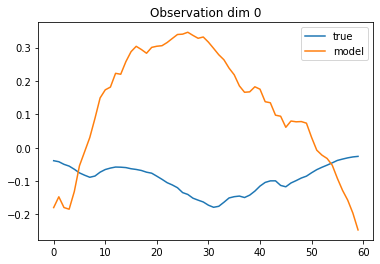

In [ ]:
#@title Visualise observations
obs_idx = 4 #@param {type:"slider", min:0, max:25, step:1}

plt.figure()
t = range(eval_seq_len)
plt.plot(t, observations[start:start+eval_seq_len,obs_idx], label='true')
plt.plot(t, eval_obs[:,obs_idx], label='model')
plt.title(f'Observation dim {obs_idx}')
plt.legend()
plt.show()

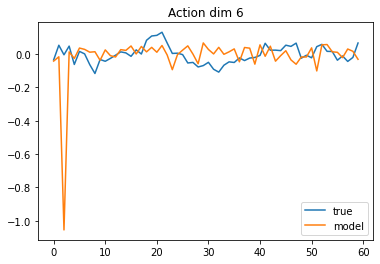

In [ ]:
#@title Visualise actions
acts_idx = 6 #@param {type:"slider", min:0, max:7, step:1}

plt.figure()
t = range(eval_seq_len)
plt.plot(t, actions[start:start+eval_seq_len,acts_idx], label='true')
plt.plot(t, eval_acts[:,acts_idx], label='model')
plt.title(f'Action dim {acts_idx}')
plt.legend()
plt.show()

# Perfect, Deterministic Reset and Replay

In [ ]:
import gym
import time
import pandaRL
if RELATIVE_JOINTS:
    env = gym.make('pandaPlayJoints-v0')
else:
    env = gym.make('pandaPlay-v0')
env.render('human')
env.reset()

In [ ]:
idx = np.random.choice(len(o))
traj_end = len(np.where(m[idx] == 1)[0])-1
#env.panda.reset_goal_pos(ag_to_dg(g[idx, traj_end,:]))
env.p.restoreState(fileName=dataset_path+'states_and_ims/'+str(int(pth[idx]))+'/env_states/'+str(int(tsteps[idx,0]))+'.bullet')



In [ ]:
for i in range(0, traj_end+1):
    #env.p.restoreState(fileName=dataset_path+str(int(pth[idx]))+'/env_states/'+str(int(tsteps[idx,i]))+'.bullet')
    #time.sleep(0.1)
    env.step(a[idx, i, :])

In [ ]:
def test_subsequences(use_ori = True, replay=False):
    
    t_it = iter(tf_valid_data)
    obs, acts, goals, masks, pth, tsteps = t_it.next()
    idx = np.random.choice(len(obs))
    
    
    start_idx = str(int(tsteps[idx,0]))
    traj_end = len(np.where(masks[idx] == 1)[0])-1
    
    env.p.restoreState(fileName=dataset_path+'states_and_ims/'+str(int(pth[idx]))+'/env_states/'+str(int(tsteps[idx,0]))+'.bullet')
    
    o = tf.expand_dims(obs[idx][0],0)
    
    goal = goals[idx, traj_end,:]
    #env.panda.reset_goal_pos(ag_to_dg(goal))
    goal = tf.expand_dims(goal, 0)
    
    
    if replay:
        retries = 1
    else:
        retries = 1
        
    for i in range(0,retries):
        past_state = [None, None]
        for i in range(0, traj_end+1):

            distrib, past_state = model(o, goal,  past_state = past_state)
            a = distrib.sample().numpy().squeeze() 
            
            if use_ori:
                a[3:7] =  np.array(env.panda.default_arm_orn) # because it hasn't ever had to cope with
            if replay:
                a=acts[idx, i, :] # uncomment this to replay play subsequences
            o, r, d, _ = env.step(a)
            o = tf.expand_dims(o['observation'], 0)

# MLP Evaluation

In [ ]:
def ag_to_dg(ag):
    dg = np.concatenate([ag[0:3], ag[7:10]])
    return dg

In [ ]:
# This below is only appropriate for non sequence models, which will aim for shorter timespans. 
n_valid_trajectories = len(valid_data['obs'])
idx = np.random.choice(n_valid_trajectories)
traj_obs, traj_acts, traj_init_o, traj_init_v = [valid_data[key][idx] for key in valid_data.keys()]

In [ ]:

o = env.reset()
# A few representative points along the trajectory for us to test how it goes from there (before it loses coherence
# over the long trajectory)
ZERO, QUARTER, HALF, THREEQ = 0, len(traj_obs)//4, len(traj_obs)//2, len(traj_obs)*3//4
# Get the init point
init_o = traj_obs[THREEQ][START_OBS:END_OBS]# traj_init_o
# reset to our desired init, but with 0 velocity - fine for now. 
env.robot.reset(env, init_o, traj_init_v)
# select the goal as the end state of the trajectory 
goal = traj_obs[-1][START_GOAL:END_GOAL]
for i in range(len(traj_acts)):
    o = tf.expand_dims(np.concatenate([o[START_OBS:END_OBS], goal], -1),0)
    if PROBS:# need to sample from the model if its probabilistic. 
        a = model(o).sample()[0]
    else:
        a = model.predict(o)[0]
    #a = traj_acts[i]
    o, r, d, _ = env.step(a) # the key change
    
    env.render()

# LSTM Evaluation

In [ ]:
valid = dataset[int(N_TRAJS*train_partition):]

def test_subsequences():
    
    obs, acts, goals, masks = sample_sequence_batch(valid)
    o = env.reset()
    idx = np.random.choice(len(obs))
    traj_end = len(np.where(masks[idx] == 1)[0])-1

    masks[idx][traj_end]
    start_pos = obs[idx][0][START_OBS:END_OBS].numpy()
    goal = np.expand_dims(obs[idx][traj_end][START_GOAL:END_GOAL],0)
    zero_vel = np.zeros(29)

    env.robot.reset(env, start_pos, zero_vel)
    o = np.squeeze(obs[idx][0])
    env.render()
    past_state = [None, None]
    
    for i in range(0,3):
        for i in range(0, traj_end+1):
            o = tf.expand_dims(o[START_OBS:END_OBS], 0)
            distrib, past_state = model(o, goal,  past_state = past_state)

            a = distrib.sample().numpy().squeeze() 
            #a = acts[idx, i, :] # uncomment this to replay play subsequences
            o, r, d, _ = env.step(a)
            env.render()


In [ ]:
# What about on a full trajectory? Where we give it the intermediate goals?
n_valid_trajectories = len(valid)
idx = np.random.choice(n_valid_trajectories)
traj_obs, traj_acts, traj_goals, traj_init_o, traj_init_v = [valid[idx][key] for key in valid[idx].keys()]
o = env.reset()
traj_len = len(traj_obs)
intervals = np.array([0, traj_len//4, traj_len//2, traj_len*3//4, traj_len])
init_o = traj_obs[0][START_OBS:END_OBS]# traj_init_o
# reset to our desired init, but with 0 velocity - fine for now. 
env.robot.reset(env, init_o, traj_init_v)
env.render()

    


In [ ]:
past_state = [None, None]
for t in range(traj_len):
        goal_idx = np.where(t < intervals)[0][0] # which part of the task we are up to
        goal = tf.cast(tf.expand_dims(traj_obs[intervals[goal_idx]-1][START_GOAL:END_GOAL], 0), tf.float32)
        o = tf.cast(tf.expand_dims(o[START_OBS:END_OBS],0), tf.float32)
        distrib, past_state = model(o,goal, past_state = past_state)
        
        #a = distrib.sample().numpy().squeeze() 
        a = traj_acts[t, :] # uncomment this to replay play subsequences
        o, r, d, _ = env.step(a)
        env.render()

In [ ]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
#     train_acc_metric.update_state(y, logits)
    return loss_value

@tf.function
def test_step(x, y):
    val_logits = model(x, training=False)
#     val_acc_metric.update_state(y, val_logits)

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch}")
    start_time = time.time()
    progbar = Progbar(len(observations), verbose=1, interval=0.5)

    # Iterate over the batches of the dataset.
    for step, (obs,acts) in enumerate(zip(observations, actions)):
#         obs = traj_batch['observations']
#         acts = traj_batch['actions']
    
        loss_value = train_step(obs, acts)
        progbar.add(1, [('Loss', loss_value)]) 

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch}")
    start_time = time.time()
    progbar = Progbar(len(observations), verbose=1, interval=0.5)

    # Iterate over the batches of the dataset.
    for step, (obs,acts) in enumerate(zip(observations, actions)):
#         obs = traj_batch['observations']
#         acts = traj_batch['actions']
    
        loss_value = train_step(obs, acts)
        progbar.add(1, [('Loss', loss_value)])  

88.02201747894287 19.151499032974243


In [ ]:
import gym
import adept_envs

env = gym.make("kitchen_relax-v1")

Reading configurations for Franka
Initializing Franka sim
registering the liscence


/home/sholto/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# MLP Evaluation

In [ ]:
# This below is only appropriate for non sequence models, which will aim for shorter timespans. 
n_valid_trajectories = len(valid_data['obs'])
idx = np.random.choice(n_valid_trajectories)
traj_obs, traj_acts, traj_init_o, traj_init_v = [valid_data[key][idx] for key in valid_data.keys()]

In [ ]:

o = env.reset()
# A few representative points along the trajectory for us to test how it goes from there (before it loses coherence
# over the long trajectory)
ZERO, QUARTER, HALF, THREEQ = 0, len(traj_obs)//4, len(traj_obs)//2, len(traj_obs)*3//4
# Get the init point
init_o = traj_obs[THREEQ][START_OBS:END_OBS]# traj_init_o
# reset to our desired init, but with 0 velocity - fine for now. 
env.robot.reset(env, init_o, traj_init_v)
# select the goal as the end state of the trajectory 
goal = traj_obs[-1][START_GOAL:END_GOAL]
for i in range(len(traj_acts)):
    o = tf.expand_dims(np.concatenate([o[START_OBS:END_OBS], goal], -1),0)
    if PROBS:# need to sample from the model if its probabilistic. 
        a = model(o).sample()[0]
    else:
        a = model.predict(o)[0]
    #a = traj_acts[i]
    o, r, d, _ = env.step(a) # the key change
    
    env.render()

# LSTM Evaluation

In [ ]:

def test_subsequences():
    obs, acts, masks = sample_sequence_batch(valid_data)
    o = env.reset()
    idx = np.random.choice(len(obs))
    traj_end = len(np.where(masks[idx] == 1)[0])-1

    masks[idx][traj_end]
    start_pos = obs[idx][0][START_OBS:END_OBS].numpy()
    goal = obs[idx][traj_end][START_GOAL:END_GOAL]
    zero_vel = np.zeros(29)

    env.robot.reset(env, start_pos, zero_vel)
    o = np.squeeze(obs[idx][0])
    env.render()


    past_state = [None, None]

    for i in range(0, traj_end+1):
        o = tf.expand_dims(np.concatenate([o[START_OBS:END_OBS], goal], -1),0)
        distrib, past_state = model(o, past_state = past_state)
        #a = acts[idx, i, :] # uncomment this to replay play subsequences
        a = distrib.sample().numpy().squeeze() 
        o, r, d, _ = env.step(a)
        env.render()
    

In [ ]:
for i in range(0,100):
    test_subsequences()

In [ ]:
# What about on a full trajectory? Where we give it the intermediate goals?
n_valid_trajectories = len(valid_data)
idx = np.random.choice(n_valid_trajectories)
traj_obs, traj_acts, traj_init_o, traj_init_v = [valid_data[key][idx] for key in valid_data.keys()]
o = env.reset()
traj_len = len(traj_obs)
intervals = np.array([0, traj_len//4, traj_len//2, traj_len*3//4, traj_len])
init_o = traj_obs[0][START_OBS:END_OBS]# traj_init_o
# reset to our desired init, but with 0 velocity - fine for now. 
env.robot.reset(env, init_o, traj_init_v)
env.render()

    


In [ ]:
past_state = [None, None]
for t in range(traj_len):
        goal_idx = np.where(t < intervals)[0][0] # which part of the task we are up to
        goal = traj_obs[intervals[goal_idx]-1][START_GOAL:END_GOAL]
        o = tf.expand_dims(np.concatenate([o[START_OBS:END_OBS], goal], -1),0)
        distrib, past_state = model(o, past_state = past_state)
        #a = acts[idx, i, :] # uncomment this to replay play subsequences
        a = distrib.sample().numpy().squeeze() 
        o, r, d, _ = env.step(a)
        env.render()

In [ ]:
# What about on a full trajectory? Where we give it the intermediate goals?
n_valid_trajectories = len(valid_data)
idx = np.random.choice(n_valid_trajectories)
traj_obs, traj_acts, traj_init_o, traj_init_v = [valid_data[key][idx] for key in valid_data.keys()]
o = env.reset()
traj_len = len(traj_obs)
intervals = np.array([0, traj_len//4, traj_len//2, traj_len*3//4, traj_len])
init_o = traj_obs[0][START_OBS:END_OBS]# traj_init_o
# reset to our desired init, but with 0 velocity - fine for now. 
env.robot.reset(env, init_o, traj_init_v)
env.render()

In [ ]:
past_state = [None, None]
for t in range(traj_len):
        goal_idx = np.where(t < intervals)[0][0] # which part of the task we are up to
        goal = traj_obs[intervals[goal_idx]-1][START_GOAL:END_GOAL]
        o = tf.expand_dims(np.concatenate([o[START_OBS:END_OBS], goal], -1),0)
        distrib, past_state = model(o, past_state = past_state)
        #a = acts[idx, i, :] # uncomment this to replay play subsequences
        a = distrib.sample().numpy().squeeze() 
        o, r, d, _ = env.step(a)
        env.render()

In [ ]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
#     train_acc_metric.update_state(y, logits)
    return loss_value

@tf.function
def test_step(x, y):
    val_logits = model(x, training=False)
#     val_acc_metric.update_state(y, val_logits)

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch}")
    start_time = time.time()
    progbar = Progbar(len(observations), verbose=1, interval=0.5)

    # Iterate over the batches of the dataset.
    for step, (obs,acts) in enumerate(zip(observations, actions)):
#         obs = traj_batch['observations']
#         acts = traj_batch['actions']
    
        loss_value = train_step(obs, acts)
        progbar.add(1, [('Loss', loss_value)])  